In [36]:
import pandas as pd
import json

# Load transactions data
transactions_df = pd.read_csv("../data/raw_data/transactions_data.csv")
print("Transactions Data Overview:")
display(transactions_df.head())

# Load users data
users_df = pd.read_csv("../data/raw_data/users_data.csv")
print("Users Data Overview:")
display(users_df.head())

# Load MCC Codes (JSON file)
with open("../data/raw_data/mcc_codes.json", "r") as file:
    mcc_codes = json.load(file)

print("MCC Codes Example:")

# Check the type of mcc_codes
print(f"Type of mcc_codes: {type(mcc_codes)}")

# If it's a dictionary, print the first 5 keys
if isinstance(mcc_codes, dict):
    first_5_keys = list(mcc_codes.keys())[:5]  # Extract first 5 keys
    for key in first_5_keys:
        print(f"{key}: {mcc_codes[key]}")

# If it's a list, print the first 5 items
elif isinstance(mcc_codes, list):
    print(mcc_codes[:5])  # Works for lists

Transactions Data Overview:


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


Users Data Overview:


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


MCC Codes Example:
Type of mcc_codes: <class 'dict'>
5812: Eating Places and Restaurants
5541: Service Stations
7996: Amusement Parks, Carnivals, Circuses
5411: Grocery Stores, Supermarkets
4784: Tolls and Bridge Fees


In [37]:
# Import required libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load CSV files
transactions_df = pd.read_csv("../data/raw_data/transactions_data.csv")
users_df = pd.read_csv("../data/raw_data/users_data.csv")

# Load JSON file
with open("../data/raw_data/mcc_codes.json", "r") as file:
    mcc_data = json.load(file)

# Convert MCC JSON to DataFrame
mcc_df = pd.DataFrame(mcc_data.items(), columns=["Code", "Description"])

In [39]:
# Check for missing values in Transactions Data
print("\n Missing Values in Transactions Data:")
print(transactions_df.isnull().sum())

# Check for missing values in Users Data
print("\nMissing Values in Users Data:")
print(users_df.isnull().sum())

# Check for missing values in MCC Codes
print("\nMissing Values in MCC Codes:")
print(mcc_df.isnull().sum())

# Check for duplicate values
print("\nChecking for Duplicates:")
print(f"Transactions Duplicate Rows: {transactions_df.duplicated().sum()}")
print(f"Users Duplicate Rows: {users_df.duplicated().sum()}")
print(f"MCC Duplicate Rows: {mcc_df.duplicated().sum()}")


 Missing Values in Transactions Data:
id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

Missing Values in Users Data:
id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

Missing Values in MCC Codes:
Code           0
Description    0
dtype: int64

Checking for Duplicates:
Transactions Duplicate Rows: 0
Users Duplicate Rows: 0
MCC Duplicate Rows: 0


In [40]:
import pandas as pd

### Drop Unnecessary Columns ###
columns_to_drop = ["merchant_state", "zip", "errors"]
transactions_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Ignore errors if column doesn't exist

### Fixing 'amount' Column ### Remove '$' symbol (if present) and convert to float
transactions_df["amount"] = transactions_df["amount"].replace('[\$,]', '', regex=True).astype(float)

### Fixing 'date' Column ### Convert 'date' column to proper datetime format
transactions_df["date"] = pd.to_datetime(transactions_df["date"], errors='coerce')

# Extract useful time-based features
transactions_df["year"] = transactions_df["date"].dt.year
transactions_df["month"] = transactions_df["date"].dt.month
transactions_df["day"] = transactions_df["date"].dt.day
transactions_df["weekday"] = transactions_df["date"].dt.day_name()  # Gets 'Monday', 'Tuesday', etc.

### Convert Categorical Columns ### Convert necessary columns to 'category' dtype for efficiency
categorical_columns = ["use_chip", "merchant_city", "mcc"]
for col in categorical_columns:
    if col in transactions_df.columns:
        transactions_df[col] = transactions_df[col].astype("category")

# Convert 'gender' column in users_df to category
if "gender" in users_df.columns:
    users_df["gender"] = users_df["gender"].astype("category")

###  Validate Processing ###
print("\n Data Processing Completed!")
print("\n Transactions Data Types After Processing:\n", transactions_df.dtypes)
print("\n Users Data Types After Processing:\n", users_df.dtypes)

#Preview first few rows to confirm transformations
print("\n Transactions Data Preview:\n", transactions_df.head())


 Data Processing Completed!

 Transactions Data Types After Processing:
 id                        int64
date             datetime64[ns]
client_id                 int64
card_id                   int64
amount                  float64
use_chip               category
merchant_id               int64
merchant_city          category
mcc                    category
year                      int32
month                     int32
day                       int32
weekday                  object
dtype: object

 Users Data Types After Processing:
 id                      int64
current_age             int64
retirement_age          int64
birth_year              int64
birth_month             int64
gender               category
address                object
latitude              float64
longitude             float64
per_capita_income      object
yearly_income          object
total_debt             object
credit_score            int64
num_credit_cards        int64
dtype: object

 Transactions Data Prev

In [41]:
# Convert weekday to categorical type
transactions_df['weekday'] = pd.Categorical(
    transactions_df['weekday'],
    categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered=True
)

# Map to numerical values (if needed for ML)
transactions_df['weekday_num'] = transactions_df['weekday'].cat.codes

# Verify the changes
print(transactions_df[['weekday', 'weekday_num']].head())
print(transactions_df.dtypes)  # Check updated data types

  weekday  weekday_num
0  Friday            4
1  Friday            4
2  Friday            4
3  Friday            4
4  Friday            4
id                        int64
date             datetime64[ns]
client_id                 int64
card_id                   int64
amount                  float64
use_chip               category
merchant_id               int64
merchant_city          category
mcc                    category
year                      int32
month                     int32
day                       int32
weekday                category
weekday_num                int8
dtype: object


In [42]:
# Fix financial columns: Remove $ and , then convert to float
financial_cols = ["yearly_income", "total_debt", "per_capita_income"]
for col in financial_cols:
    users_df[col] = users_df[col].replace('[\$,]', '', regex=True).astype(float)

In [43]:
# Creating a refund flag (True if amount is negative or else false)
transactions_df['is_refund'] = transactions_df['amount'] < 0

# Converting negative amounts to absolute values
transactions_df['amount'] = transactions_df['amount'].abs()

# Verify changes
print(transactions_df[['amount', 'is_refund']].head())  # Check new values
print(transactions_df.dtypes)  # Confirm dtype changes

   amount  is_refund
0   77.00       True
1   14.57      False
2   80.00      False
3  200.00      False
4   46.41      False
id                        int64
date             datetime64[ns]
client_id                 int64
card_id                   int64
amount                  float64
use_chip               category
merchant_id               int64
merchant_city          category
mcc                    category
year                      int32
month                     int32
day                       int32
weekday                category
weekday_num                int8
is_refund                  bool
dtype: object


In [44]:
# Overview of Transactions Dataset
print(" Transactions Data Overview:")
print(transactions_df.info())  # Check column names, data types, and missing values
print(transactions_df.head())  # Show first few rows

# Overview of Users Dataset
print("\n Users Data Overview:")
print(users_df.info())
print(users_df.head())

# Overview of MCC Codes Dataset
print("\n MCC Codes Overview:")
print(mcc_df.info())
print(mcc_df.head())

 Transactions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   date           datetime64[ns]
 2   client_id      int64         
 3   card_id        int64         
 4   amount         float64       
 5   use_chip       category      
 6   merchant_id    int64         
 7   merchant_city  category      
 8   mcc            category      
 9   year           int32         
 10  month          int32         
 11  day            int32         
 12  weekday        category      
 13  weekday_num    int8          
 14  is_refund      bool          
dtypes: bool(1), category(4), datetime64[ns](1), float64(1), int32(3), int64(4), int8(1)
memory usage: 850.5 MB
None
        id                date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01 00:01:00       1556     2972   77.00  Swi

In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Drop the 'address' column only if it exists
if 'address' in users_df.columns:
    users_df.drop(columns=["address"], inplace=True)

# Check if 'gender' column exists before applying One-Hot Encoding
if 'gender' in users_df.columns:
    users_df = pd.get_dummies(users_df, columns=["gender"], drop_first=True)

# Verify changes
print("\nUsers Data Types After Processing:\n", users_df.dtypes)
print("\nUsers Data Preview:\n", users_df.head())

# Remaining object columns
print("\nRemaining Object Columns:\n", users_df.select_dtypes(include=['object']).columns)


Users Data Types After Processing:
 id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
latitude             float64
longitude            float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
credit_score           int64
num_credit_cards       int64
gender_Male             bool
dtype: object

Users Data Preview:
      id  current_age  retirement_age  birth_year  birth_month  latitude  \
0   825           53              66        1966           11     34.15   
1  1746           53              68        1966           12     40.76   
2  1718           81              67        1938           11     34.02   
3   708           63              63        1957            1     40.71   
4  1164           43              70        1976            9     37.76   

   longitude  per_capita_income  yearly_income  total_debt  credit_score  \
0    -117.76           

In [46]:
print(transactions_df.columns)

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'mcc', 'year', 'month', 'day',
       'weekday', 'weekday_num', 'is_refund'],
      dtype='object')


In [47]:
import pandas as pd

#Frequency Encoding for MCC
mcc_freq = transactions_df["mcc"].value_counts(normalize=True)
transactions_df["mcc_freq"] = transactions_df["mcc"].map(mcc_freq)
transactions_df.drop(columns=["mcc"], inplace=True)  # Drop original MCC column

#Frequency Encoding for Merchant City
merchant_freq = transactions_df["merchant_city"].value_counts(normalize=True)
transactions_df["merchant_city_freq"] = transactions_df["merchant_city"].map(merchant_freq)
transactions_df.drop(columns=["merchant_city"], inplace=True)  # Remove original categorical column

#One-Hot Encoding for "use_chip"
transactions_df = pd.get_dummies(transactions_df, columns=["use_chip"], drop_first=True)

#Optimize Data Types
# Convert Integer Columns to Lower Memory Usage
int_cols = ["client_id", "card_id", "year", "month", "day", "weekday_num"]
transactions_df[int_cols] = transactions_df[int_cols].astype("int32")

# Convert Boolean Columns to int8 to save memory
transactions_df["is_refund"] = transactions_df["is_refund"].astype("int8")

# Verifying Changes
print("\nTransactions Data Processing Completed!\n")
print("\nTransactions Data Types After Processing:\n", transactions_df.dtypes)
print("\nTransactions Data Preview:\n", transactions_df.head())


Transactions Data Processing Completed!


Transactions Data Types After Processing:
 id                                      int64
date                           datetime64[ns]
client_id                               int32
card_id                                 int32
amount                                float64
merchant_id                             int64
year                                    int32
month                                   int32
day                                     int32
weekday                              category
weekday_num                             int32
is_refund                                int8
mcc_freq                             category
merchant_city_freq                    float64
use_chip_Online Transaction              bool
use_chip_Swipe Transaction               bool
dtype: object

Transactions Data Preview:
         id                date  client_id  card_id  amount  merchant_id  year  \
0  7475327 2010-01-01 00:01:00       1556     2972   7

In [48]:
import pandas as pd

# Optimizing Data Types due to memory issues.
# Convert int64 to int32
int_cols = ["id", "current_age", "retirement_age", "birth_year", "birth_month", "credit_score", "num_credit_cards"]
users_df[int_cols] = users_df[int_cols].astype("int32")

# Convert float64 to float32 which reduces memory
float_cols = ["latitude", "longitude", "per_capita_income", "yearly_income", "total_debt"]
users_df[float_cols] = users_df[float_cols].astype("float32")

# Convert Boolean Columns to int8 for small values.
if "gender_Male" in users_df.columns:
    users_df["gender_Male"] = users_df["gender_Male"].astype("int8")

#Verify Changes
print("\n Users Data Processing Completed!\n")
print("\nUsers Data Types After Processing:\n", users_df.dtypes)
print("\nUsers Data Preview:\n", users_df.head())


 Users Data Processing Completed!


Users Data Types After Processing:
 id                     int32
current_age            int32
retirement_age         int32
birth_year             int32
birth_month            int32
latitude             float32
longitude            float32
per_capita_income    float32
yearly_income        float32
total_debt           float32
credit_score           int32
num_credit_cards       int32
gender_Male             int8
dtype: object

Users Data Preview:
      id  current_age  retirement_age  birth_year  birth_month   latitude  \
0   825           53              66        1966           11  34.150002   
1  1746           53              68        1966           12  40.759998   
2  1718           81              67        1938           11  34.020000   
3   708           63              63        1957            1  40.709999   
4  1164           43              70        1976            9  37.759998   

    longitude  per_capita_income  yearly_income  total_de

In [49]:
print(mcc_df.columns)

Index(['Code', 'Description'], dtype='object')


In [50]:
import pandas as pd

# Convert MCC Code to integer
mcc_df["Code"] = mcc_df["Code"].astype(int)

# Create a lookup dictionary for MCC Description (for dashboard)
mcc_lookup = dict(zip(mcc_df["Code"], mcc_df["Description"]))

# Drop Description column since it's not needed for model training
mcc_df.drop(columns=["Description"], inplace=True)

# Verifying changes
print("\nMCC Data Processing Completed!\n")
print("\nMCC Data Types After Processing:\n", mcc_df.dtypes)
print("\nMCC Data Preview:\n", mcc_df.head())

# Save MCC Lookup for dashboard use
import pickle
with open("../data/processed_data/mcc_lookup.pkl", "wb") as f:
    pickle.dump(mcc_lookup, f)


MCC Data Processing Completed!


MCC Data Types After Processing:
 Code    int64
dtype: object

MCC Data Preview:
    Code
0  5812
1  5541
2  7996
3  5411
4  4784


In [51]:
import os
print(os.getcwd())  # Shows the current working directory
print(os.listdir())  # Lists files in the directory

/Users/saiajaychilakala/AI-PersonalFinanceTracker-ML/notebooks
['01_explore_data.ipynb', 'mcc_lookup.pkl', '.gitkeep', '02_data_processing.ipynb', '.ipynb_checkpoints']


In [52]:
# Check data types
print("\nTransactions Data Types After Processing:\n", transactions_df.dtypes)

# Check first few rows
print("\nTransactions Data Preview:\n", transactions_df.head())

# Check for any remaining object columns
print("\nRemaining Object Columns in Transactions Data:\n", transactions_df.select_dtypes(include=['object']).columns)


Transactions Data Types After Processing:
 id                                      int64
date                           datetime64[ns]
client_id                               int32
card_id                                 int32
amount                                float64
merchant_id                             int64
year                                    int32
month                                   int32
day                                     int32
weekday                              category
weekday_num                             int32
is_refund                                int8
mcc_freq                             category
merchant_city_freq                    float64
use_chip_Online Transaction              bool
use_chip_Swipe Transaction               bool
dtype: object

Transactions Data Preview:
         id                date  client_id  card_id  amount  merchant_id  year  \
0  7475327 2010-01-01 00:01:00       1556     2972   77.00        59935  2010   
1  7475328 2010

In [53]:
# Check data types
print("\n Users Data Types After Processing:\n", users_df.dtypes)

# Check first few rows
print("\n Users Data Preview:\n", users_df.head())

# Check for any remaining object columns
print("\n Remaining Object Columns in Users Data:\n", users_df.select_dtypes(include=['object']).columns)


 Users Data Types After Processing:
 id                     int32
current_age            int32
retirement_age         int32
birth_year             int32
birth_month            int32
latitude             float32
longitude            float32
per_capita_income    float32
yearly_income        float32
total_debt           float32
credit_score           int32
num_credit_cards       int32
gender_Male             int8
dtype: object

 Users Data Preview:
      id  current_age  retirement_age  birth_year  birth_month   latitude  \
0   825           53              66        1966           11  34.150002   
1  1746           53              68        1966           12  40.759998   
2  1718           81              67        1938           11  34.020000   
3   708           63              63        1957            1  40.709999   
4  1164           43              70        1976            9  37.759998   

    longitude  per_capita_income  yearly_income  total_debt  credit_score  \
0 -117.760002 

In [54]:
# Check data types
print("\n MCC Data Types After Processing:\n", mcc_df.dtypes)

# Check first few rows
print("\n MCC Data Preview:\n", mcc_df.head())

# Ensure `mcc_lookup.pkl` is saved correctly
import os
print("\n Checking if mcc_lookup.pkl exists:\n", "mcc_lookup.pkl" in os.listdir())


 MCC Data Types After Processing:
 Code    int64
dtype: object

 MCC Data Preview:
    Code
0  5812
1  5541
2  7996
3  5411
4  4784

 Checking if mcc_lookup.pkl exists:
 True


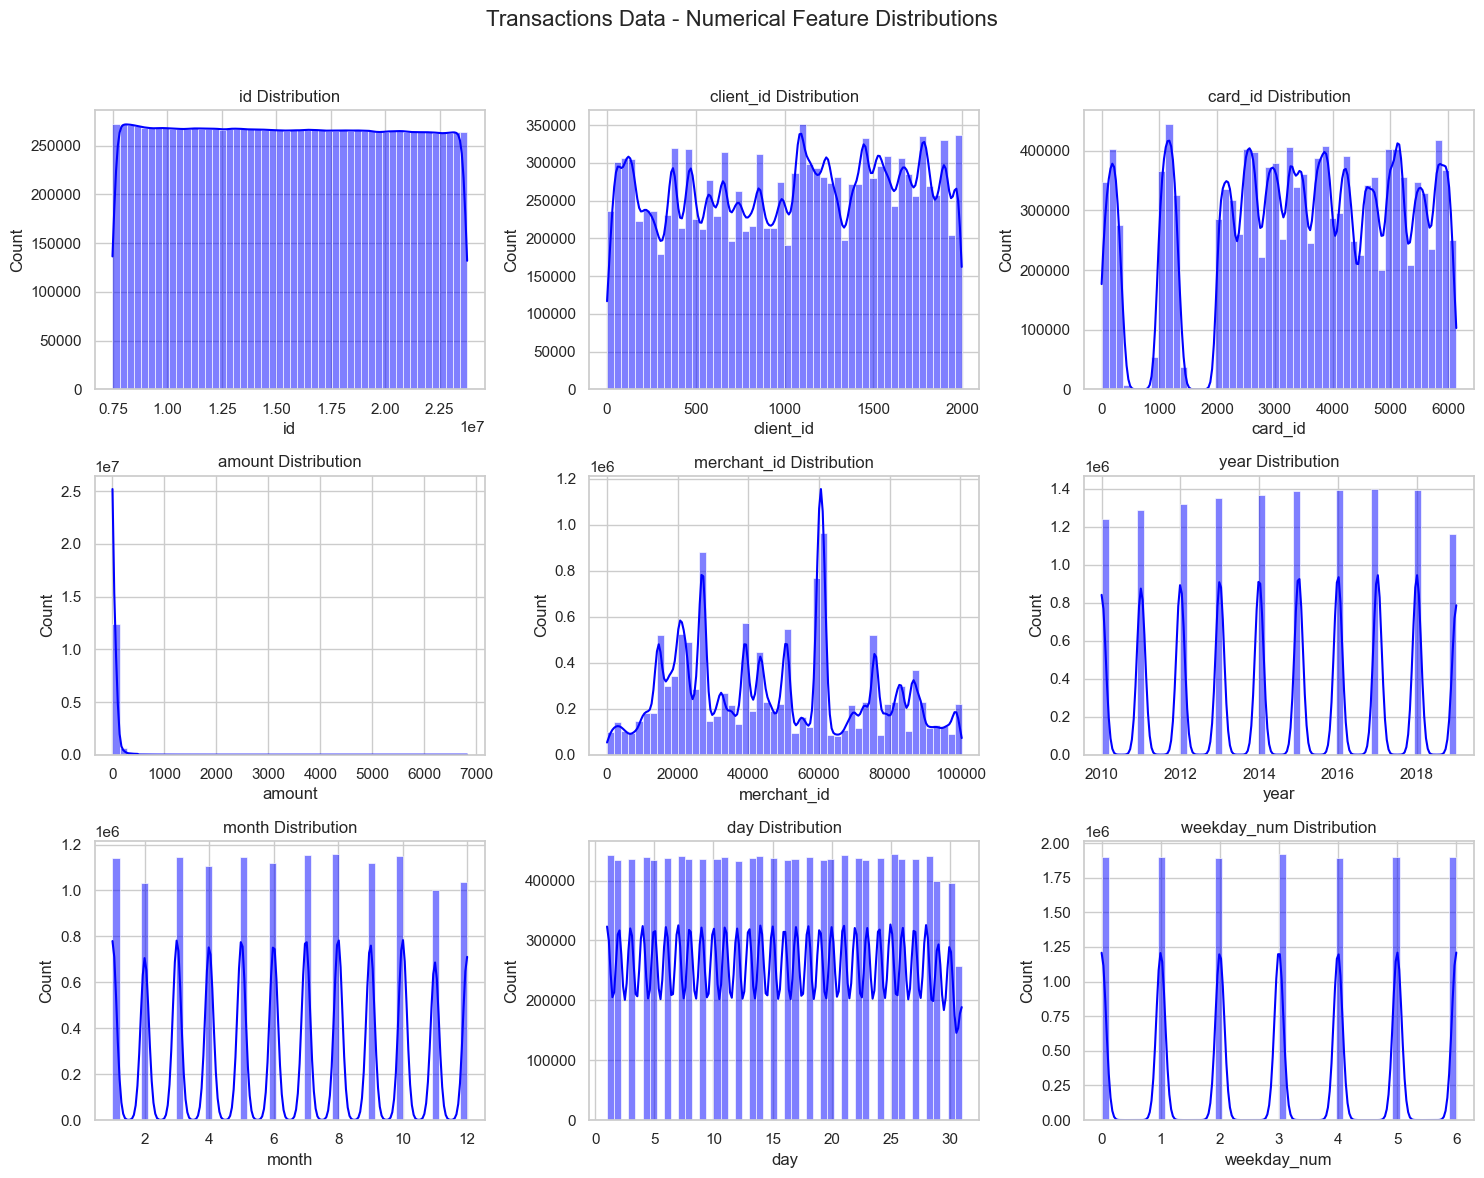

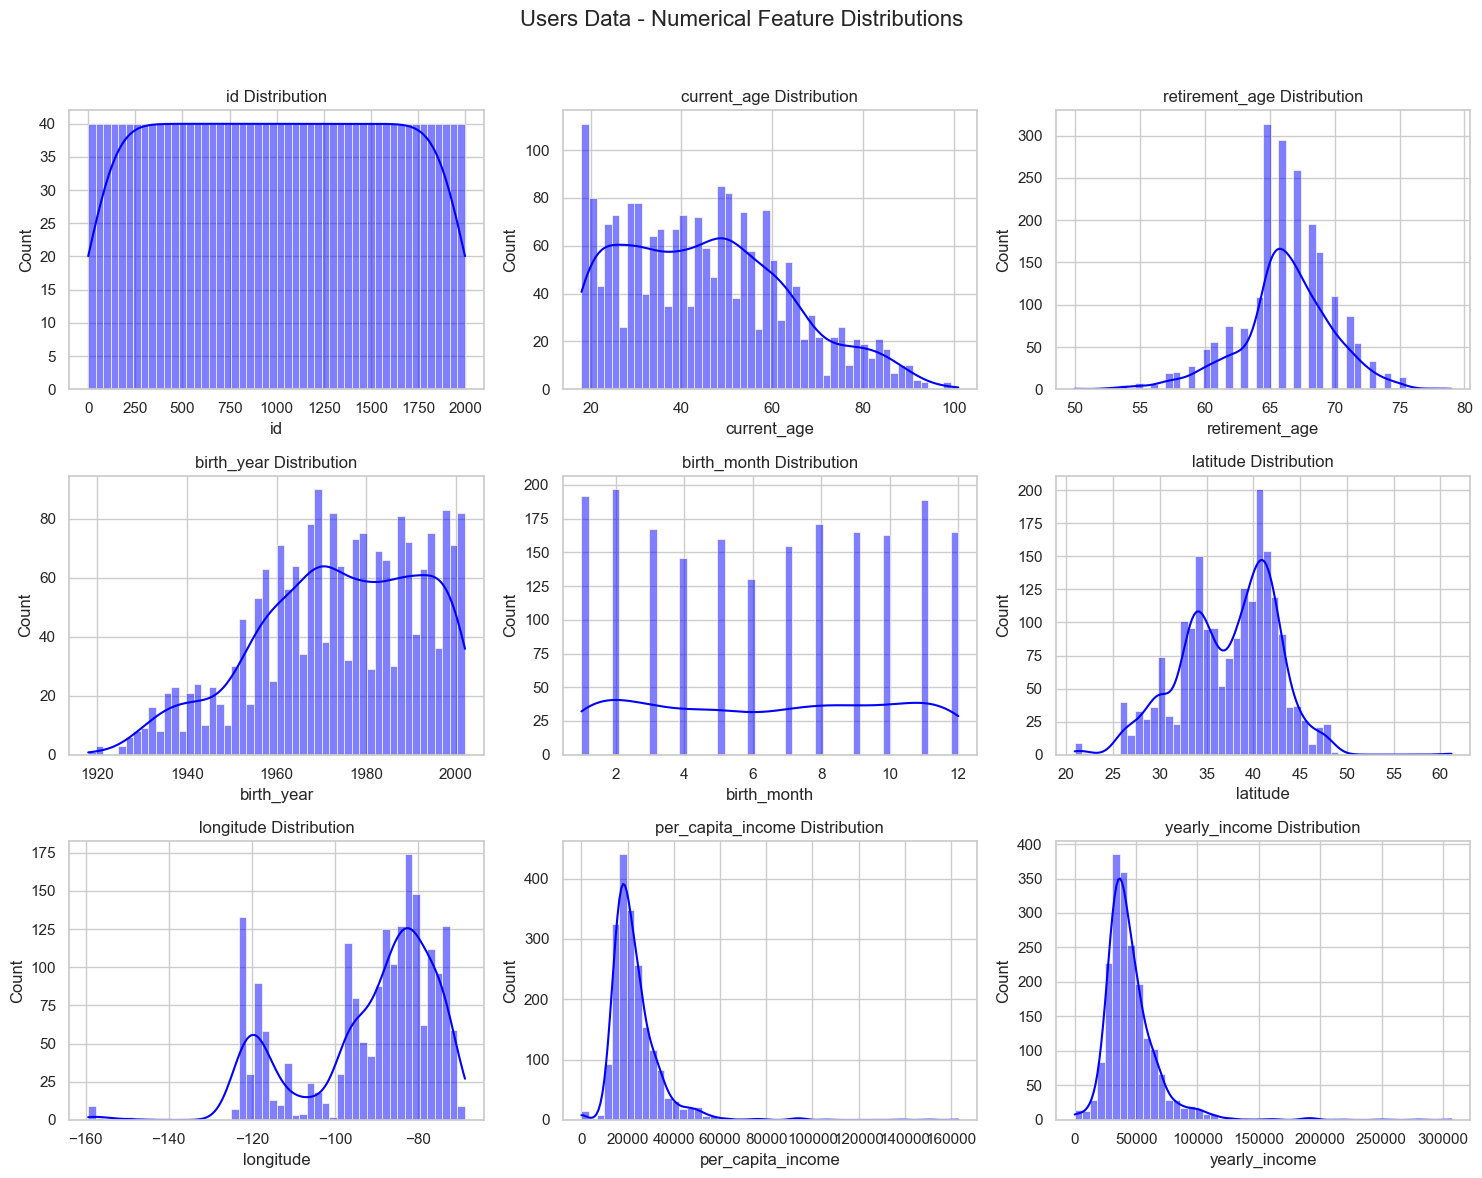

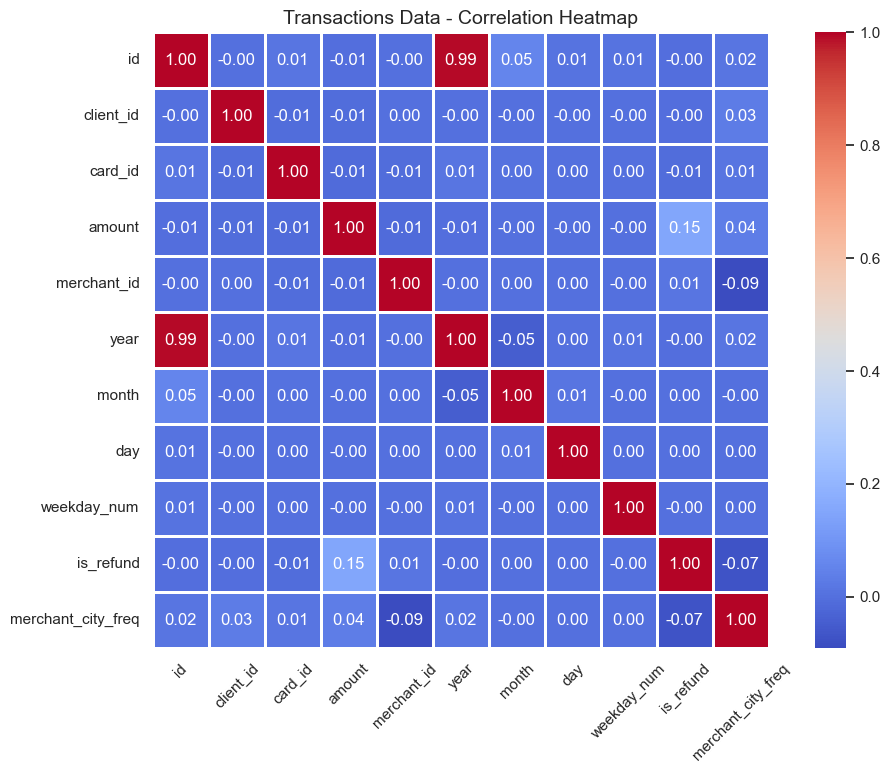

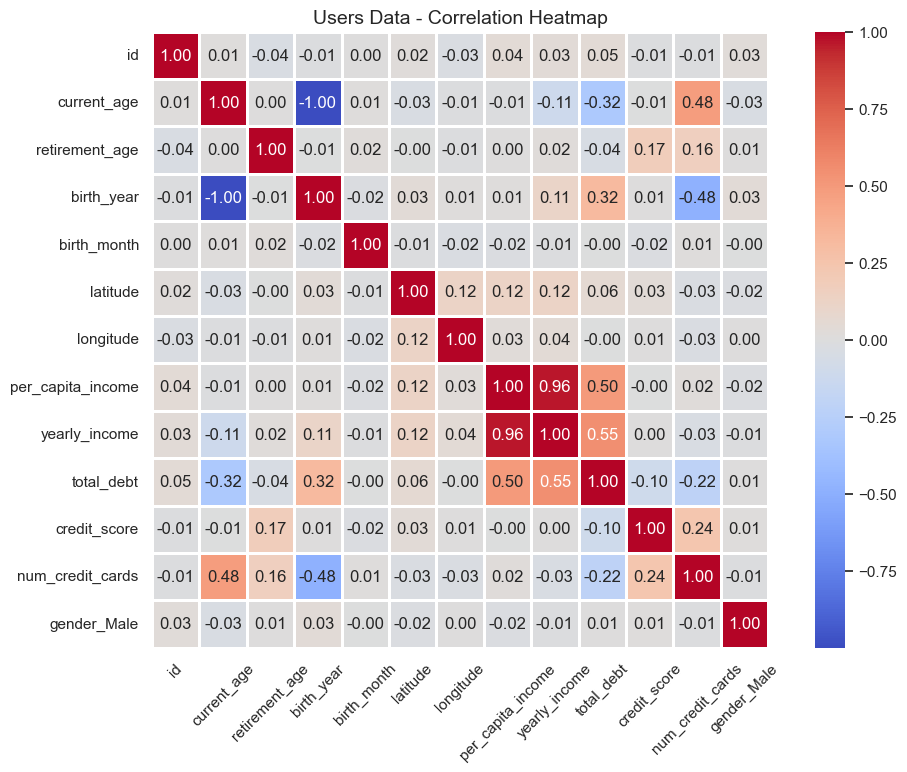

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_91875/3155676273.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], order=df[column].value_counts().index, palette="viridis")


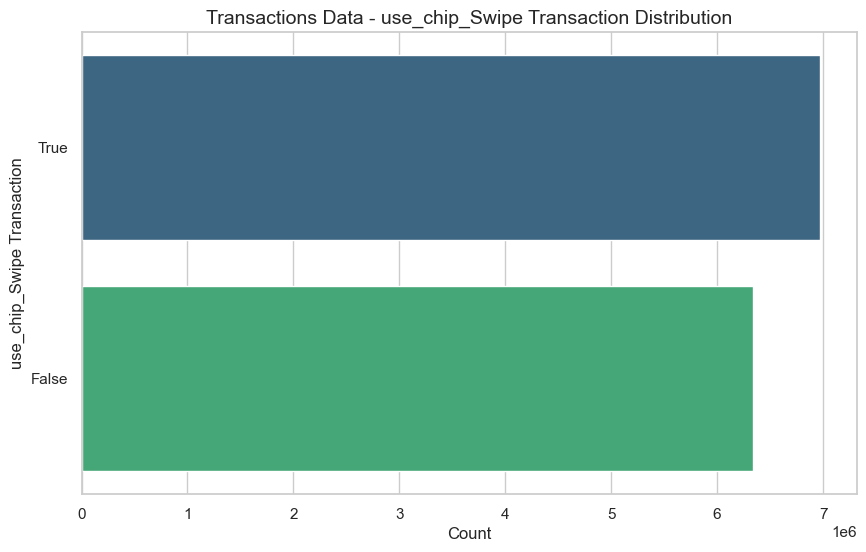

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_91875/3155676273.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], order=df[column].value_counts().index, palette="viridis")


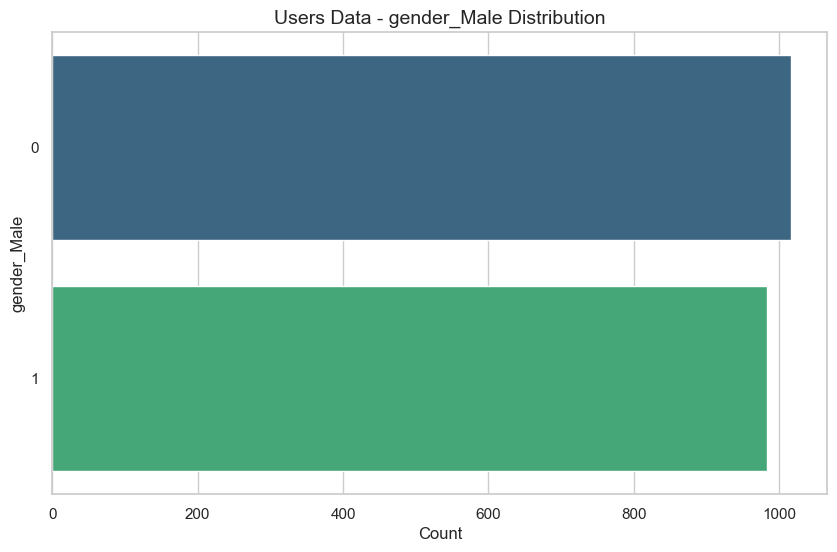

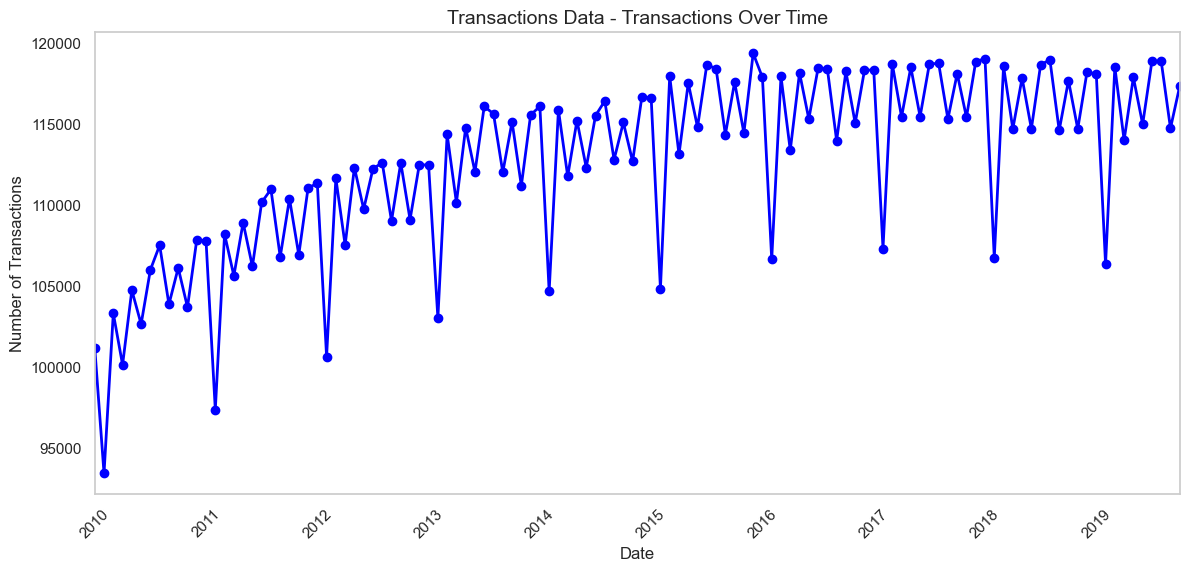

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visualization style
sns.set(style="whitegrid")

### Distribution of Numerical Features (Histograms)
def plot_numerical_distribution(df, title):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjusted for better spacing
    axes = axes.flatten()
    num_columns = df.select_dtypes(include=['number']).columns

    for i, col in enumerate(num_columns[:len(axes)]):  # Avoids errors if columns < subplot count
        sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f"{col} Distribution")

    for j in range(i + 1, len(axes)):  # Hide unused subplots
        fig.delaxes(axes[j])

    plt.suptitle(f"{title} - Numerical Feature Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for suptitle
    plt.show()

# Visualize for Transactions and Users datasets
plot_numerical_distribution(transactions_df, "Transactions Data")
plot_numerical_distribution(users_df, "Users Data")

### Correlation Heatmap
def plot_correlation_heatmap(df, title):
    plt.figure(figsize=(12, 8))  # Increased size
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, square=True)
    plt.title(f"{title} - Correlation Heatmap", fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Heatmap for Transactions and Users (Excluding Non-Numeric Columns)
plot_correlation_heatmap(transactions_df.select_dtypes(include=['number']), "Transactions Data")
plot_correlation_heatmap(users_df.select_dtypes(include=['number']), "Users Data")

### Categorical Data Distribution (Bar Plots)
def plot_categorical_distribution(df, column, title):
    plt.figure(figsize=(10, 6))  # More space for labels
    sns.countplot(y=df[column], order=df[column].value_counts().index, palette="viridis")
    plt.title(f"{title} - {column} Distribution", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

# Example: Visualize 'use_chip' in Transactions and 'gender_Male' in Users
plot_categorical_distribution(transactions_df, "use_chip_Swipe Transaction", "Transactions Data")
plot_categorical_distribution(users_df, "gender_Male", "Users Data")

### Time-Based Trends (Transactions Over Time)
def plot_time_trends(df, title):
    plt.figure(figsize=(14, 6))  # Widened for better readability
    df.groupby(df['date'].dt.to_period("M")).size().plot(kind="line", marker="o", color="blue", linewidth=2)
    plt.title(f"{title} - Transactions Over Time", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Visualize transactions over time
plot_time_trends(transactions_df, "Transactions Data")


/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_91875/3710974117.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_labels, y=top_mcc.values, palette="muted")


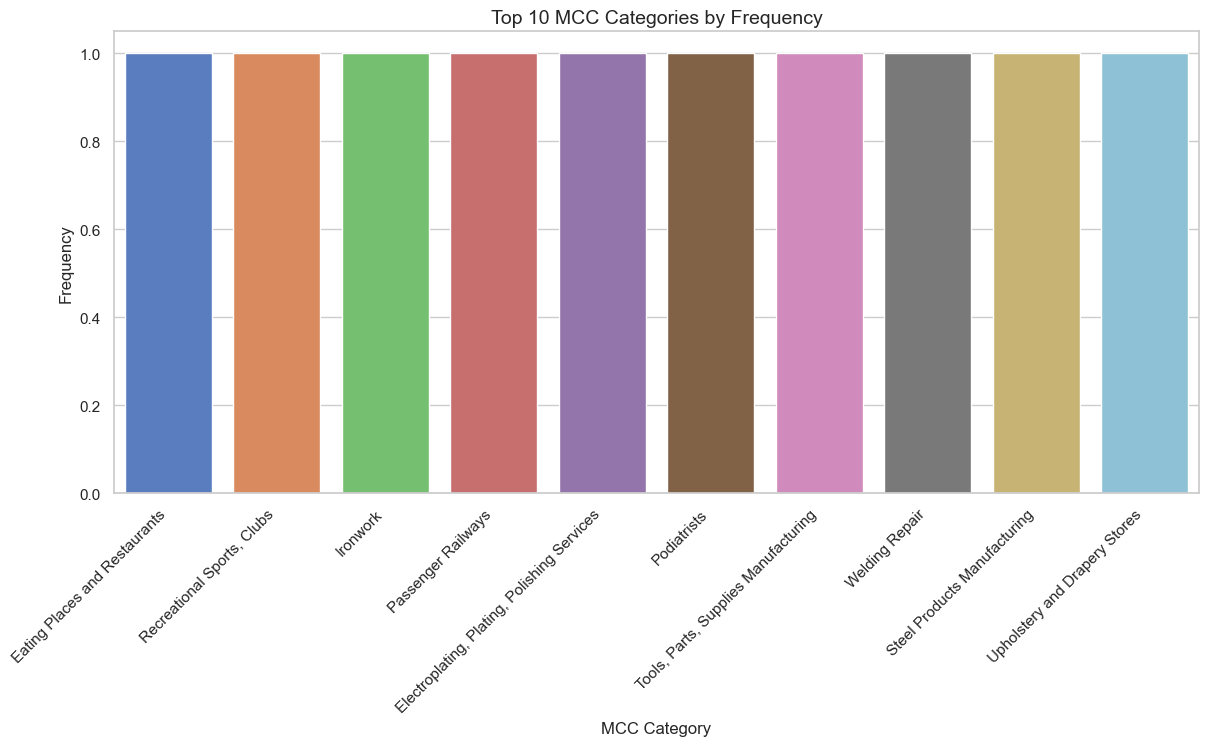

In [56]:
import pickle

# Load the MCC lookup dictionary from the saved pickle file
with open("../data/processed_data/mcc_lookup.pkl", "rb") as f:
    mcc_lookup = pickle.load(f)

# Function to plot MCC distribution with category names
def plot_mcc_distribution_with_labels(df):
    plt.figure(figsize=(14, 6))  # Adjusted for better readability

    # Get the top 10 most frequent MCC codes
    top_mcc = df["Code"].value_counts().nlargest(10)

    # Convert codes to their respective descriptions using the lookup dictionary
    category_labels = [mcc_lookup.get(code, "Unknown") for code in top_mcc.index]

    # Create a bar plot with category labels
    sns.barplot(x=category_labels, y=top_mcc.values, palette="muted")

    plt.title("Top 10 MCC Categories by Frequency", fontsize=14)
    plt.xlabel("MCC Category")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility
    plt.show()

# Call the function with MCC dataset
plot_mcc_distribution_with_labels(mcc_df)


🔹 Skewness in Transactions Dataset:

Highly Skewed Features (Threshold > 0.5):
 amount                7.534365
merchant_city_freq    2.366113
dtype: float64


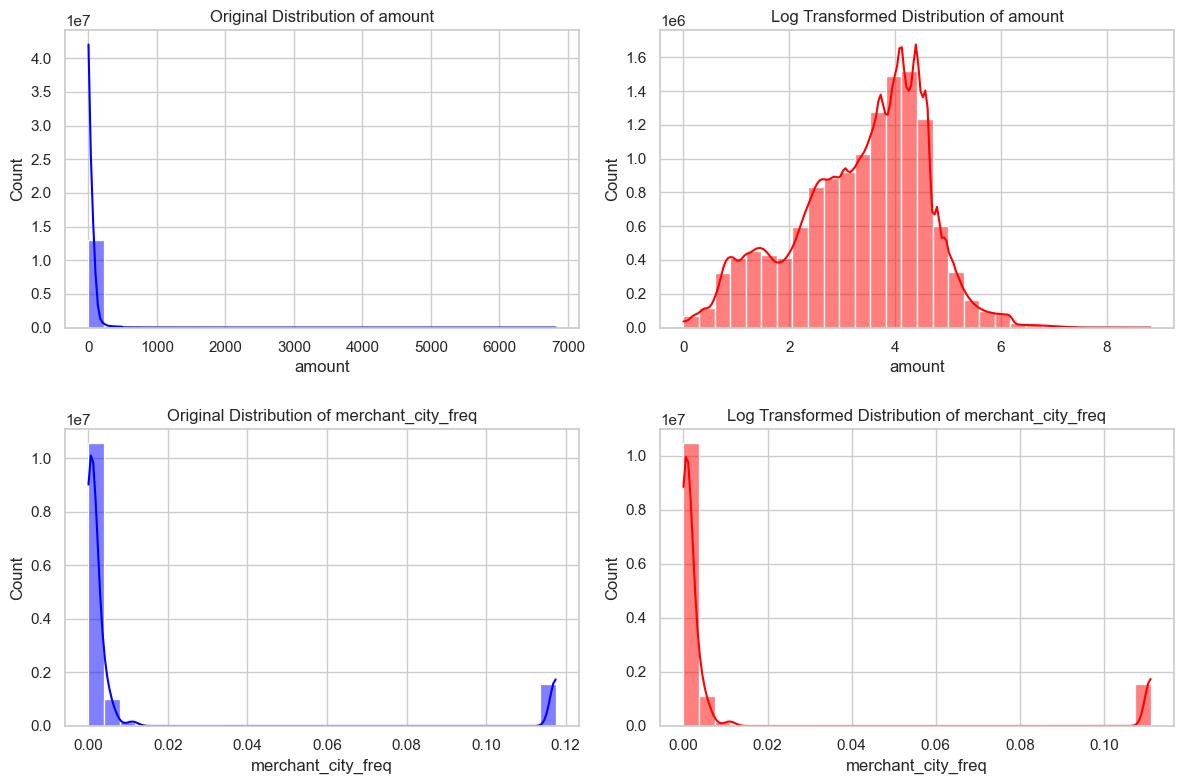


🔹 Skewness in Users Dataset:

Highly Skewed Features (Threshold > 0.5):
 per_capita_income    3.965627
yearly_income        3.447004
total_debt           1.811097
num_credit_cards     0.604748
longitude           -1.030439
dtype: float64


/Users/saiajaychilakala/AI-PersonalFinanceTracker-ML/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


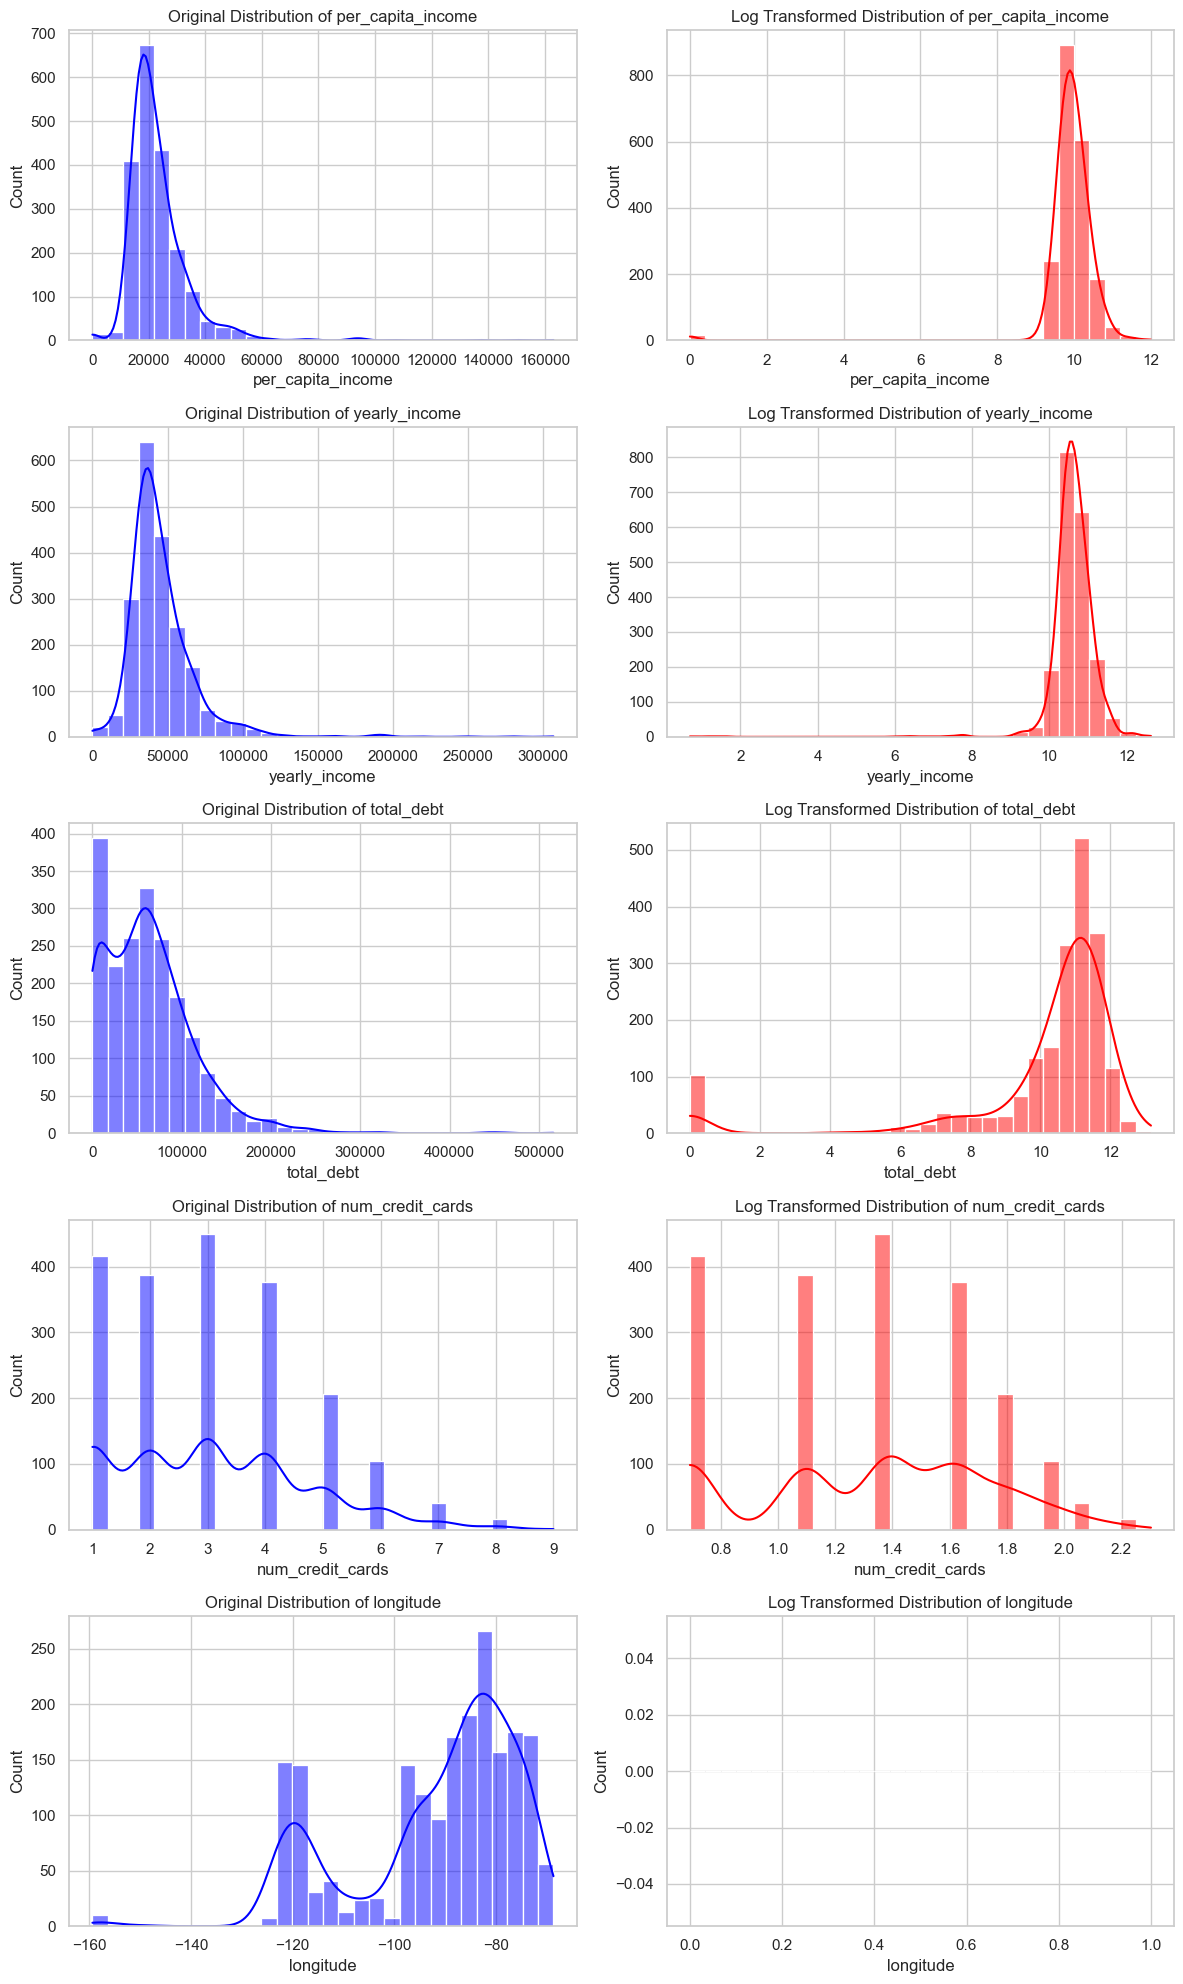

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize skewness in numerical columns
def visualize_skewness(df, threshold=0.5):
    numeric_cols = df.select_dtypes(include=["int64", "int32", "float64", "float32"]).columns
    skewed_cols = df[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

    # Filter only significantly skewed features
    skewed_cols = skewed_cols[abs(skewed_cols) > threshold]

    print(f"\nHighly Skewed Features (Threshold > {threshold}):\n", skewed_cols)

    # Plot histograms and KDE plots for skewed features
    fig, axes = plt.subplots(nrows=len(skewed_cols), ncols=2, figsize=(12, 4 * len(skewed_cols)))

    for i, col in enumerate(skewed_cols.index):
        # Original Distribution
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color="blue")
        axes[i, 0].set_title(f"Original Distribution of {col}")

        # Log Transformed Distribution (Handling Skewness)
        sns.histplot(np.log1p(df[col]), bins=30, kde=True, ax=axes[i, 1], color="red")
        axes[i, 1].set_title(f"Log Transformed Distribution of {col}")

    plt.tight_layout()
    plt.show()

# Apply to Transactions and Users DataFrames
print("\n🔹 Skewness in Transactions Dataset:")
visualize_skewness(transactions_df)

print("\n🔹 Skewness in Users Dataset:")
visualize_skewness(users_df)


📊 Boxplots for Transactions Dataset:


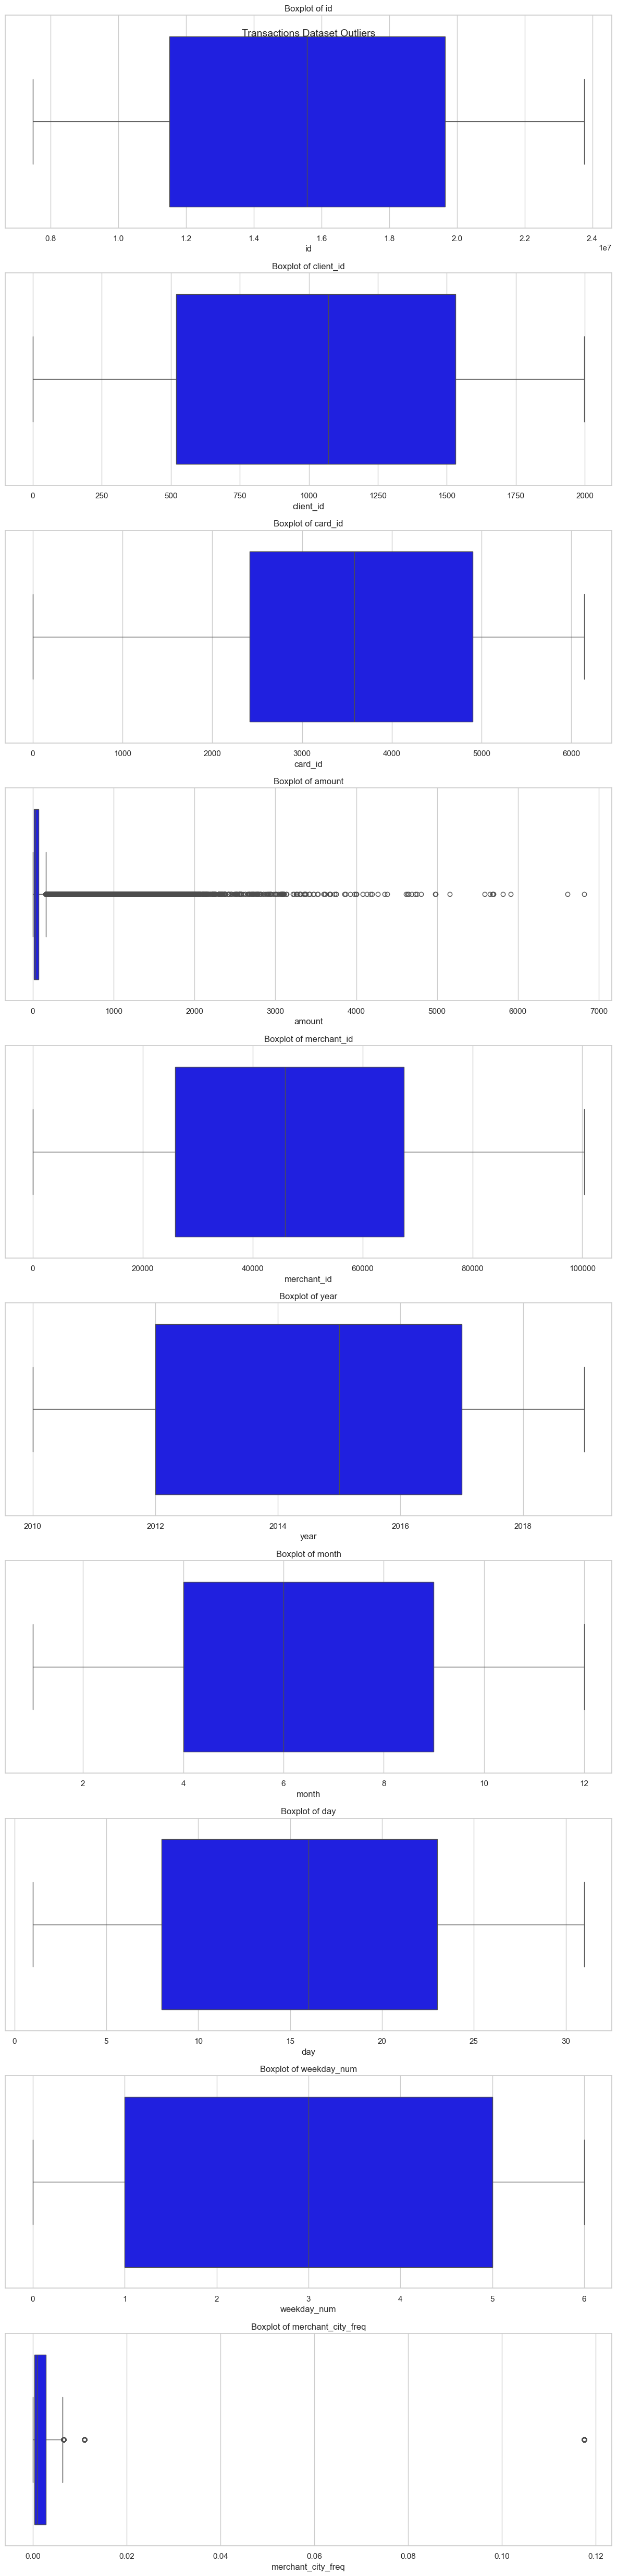


📊 Boxplots for Users Dataset:


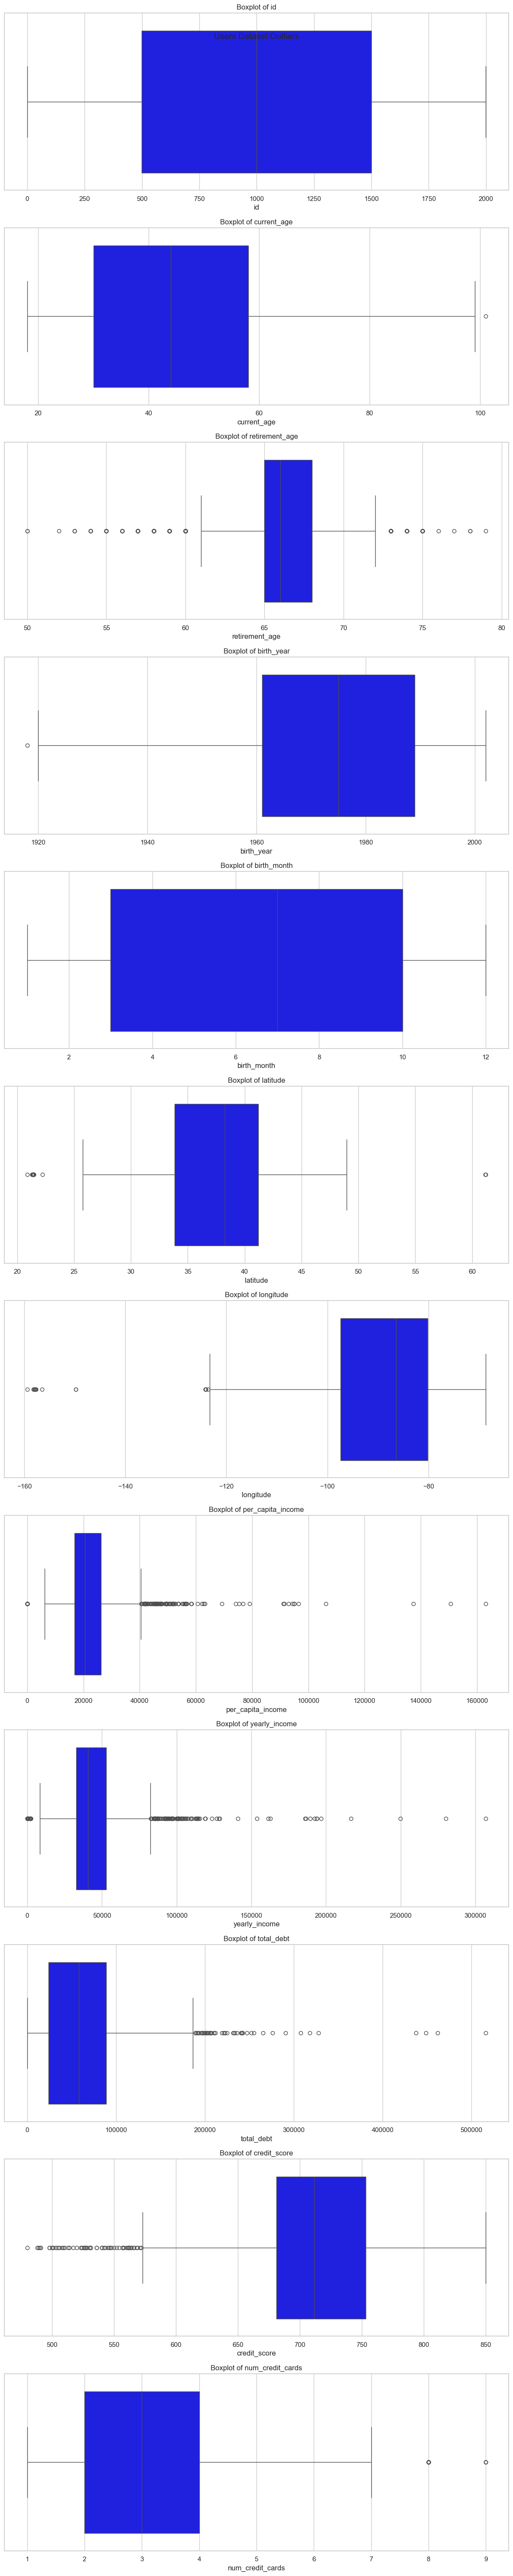

In [60]:
# Function to plot boxplots for detecting outliers
def plot_boxplots(df, title=""):
    numeric_cols = df.select_dtypes(include=["int64", "int32", "float64", "float32"]).columns
    fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(12, 5 * len(numeric_cols)))

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i], color="blue")
        axes[i].set_title(f"Boxplot of {col}")

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Apply Boxplots for Transactions and Users DataFrames
print("\n📊 Boxplots for Transactions Dataset:")
plot_boxplots(transactions_df, "Transactions Dataset Outliers")

print("\n📊 Boxplots for Users Dataset:")
plot_boxplots(users_df, "Users Dataset Outliers")

In [61]:
import pandas as pd
from IPython.display import display

# Function to calculate outlier statistics using IQR
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=["int64", "int32", "float64", "float32"]).columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]

        outlier_summary[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outlier Count": outlier_count
        }

    return outlier_summary

# Apply IQR-based Outlier Analysis
print("\n Outlier Statistics for Transactions Dataset:")
transactions_outliers = detect_outliers_iqr(transactions_df)

print("\n Outlier Statistics for Users Dataset:")
users_outliers = detect_outliers_iqr(users_df)

# Convert to DataFrames for better visualization
transactions_outliers_df = pd.DataFrame.from_dict(transactions_outliers, orient='index')
users_outliers_df = pd.DataFrame.from_dict(users_outliers, orient='index')

# Display results in Jupyter Notebook
print("\n📊 Transactions Outlier Analysis:")
display(transactions_outliers_df)

print("\n📊 Users Outlier Analysis:")
display(users_outliers_df)


 Outlier Statistics for Transactions Dataset:

 Outlier Statistics for Users Dataset:

📊 Transactions Outlier Analysis:


,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
id,1.150604e+07,1.965361e+07,8.147561e+06,-715297.000000,3.187495e+07,0
client_id,5.190000e+02,1.531000e+03,1.012000e+03,-999.000000,3.049000e+03,0
card_id,2.413000e+03,4.901000e+03,2.488000e+03,-1319.000000,8.633000e+03,0
amount,1.175000e+01,7.100000e+01,5.925000e+01,-77.125000,1.598750e+02,621500
merchant_id,2.588700e+04,6.757000e+04,4.168300e+04,-36637.500000,1.300945e+05,0
year,2.012000e+03,2.017000e+03,5.000000e+00,2004.500000,2.024500e+03,0
month,4.000000e+00,9.000000e+00,5.000000e+00,-3.500000,1.650000e+01,0
day,8.000000e+00,2.300000e+01,1.500000e+01,-14.500000,4.550000e+01,0
weekday_num,1.000000e+00,5.000000e+00,4.000000e+00,-5.000000,1.100000e+01,0
merchant_city_freq,3.879478e-04,2.804242e-03,2.416294e-03,-0.003236,6.428682e-03,1798005



📊 Users Outlier Analysis:


,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
id,499.750000,1499.250000,999.500000,-999.500000,2998.500000,0
current_age,30.000000,58.000000,28.000000,-12.000000,100.000000,1
retirement_age,65.000000,68.000000,3.000000,60.500000,72.500000,210
birth_year,1961.000000,1989.000000,28.000000,1919.000000,2031.000000,1
birth_month,3.000000,10.000000,7.000000,-7.500000,20.500000,0
latitude,33.837501,41.200001,7.362500,22.793750,52.243751,12
longitude,-97.395000,-80.129997,17.265003,-123.292505,-54.232492,17
per_capita_income,16824.500000,26286.000000,9461.500000,2632.250000,40478.250000,123
yearly_income,32818.500000,52698.500000,19880.000000,2998.500000,82518.500000,118
total_debt,23986.750000,89070.500000,65083.750000,-73638.875000,186696.125000,51


In [62]:
import numpy as np

def cap_outliers(df, columns):       #Caps extreme outliers using the IQR method.
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply capping for key features
columns_to_cap = ["yearly_income", "total_debt", "per_capita_income", "credit_score", "latitude", "longitude"]
users_df = cap_outliers(users_df, columns_to_cap)

print("\n Outlier Capping Completed for Users Dataset!")
print(users_df.describe())


 Outlier Capping Completed for Users Dataset!
                id  current_age  retirement_age   birth_year  birth_month  \
count  2000.000000  2000.000000     2000.000000  2000.000000  2000.000000   
mean    999.500000    45.391500       66.237500  1973.803000     6.439000   
std     577.494589    18.414092        3.628867    18.421234     3.565338   
min       0.000000    18.000000       50.000000  1918.000000     1.000000   
25%     499.750000    30.000000       65.000000  1961.000000     3.000000   
50%     999.500000    44.000000       66.000000  1975.000000     7.000000   
75%    1499.250000    58.000000       68.000000  1989.000000    10.000000   
max    1999.000000   101.000000       79.000000  2002.000000    12.000000   

          latitude    longitude  per_capita_income  yearly_income  \
count  2000.000000  2000.000000        2000.000000    2000.000000   
mean     37.387203   -91.353296       22331.904875   44139.140500   
std       5.059607    15.671807        7768.161971  

In [63]:
def apply_log_transform(df, columns): #Applies log transformation to reduce skewness in specified columns.
    for col in columns:
        df[col] = np.log1p(df[col])  # log1p prevents log(0) error
    return df

# Apply log transformation for transactions dataset
columns_to_log = ["amount", "merchant_city_freq"]
transactions_df = apply_log_transform(transactions_df, columns_to_log)
print("\n Log Transformation Applied!")


 Log Transformation Applied!


In [64]:
def remove_invalid_values(df): #Removes logically invalid rows from the dataset.
    df = df[(df["retirement_age"] >= 40)]  # Retirement age should be realistic
    df = df[(df["birth_year"] >= 1900) & (df["birth_year"] <= 2025)]  # Birth year should be within a valid range
    df = df[(df["credit_score"] >= 300) & (df["credit_score"] <= 850)]  # Credit score range is 300-850
    return df

# Apply filtering for logical errors
users_df = remove_invalid_values(users_df)
print("\nLogical Outliers Removed!")


Logical Outliers Removed!


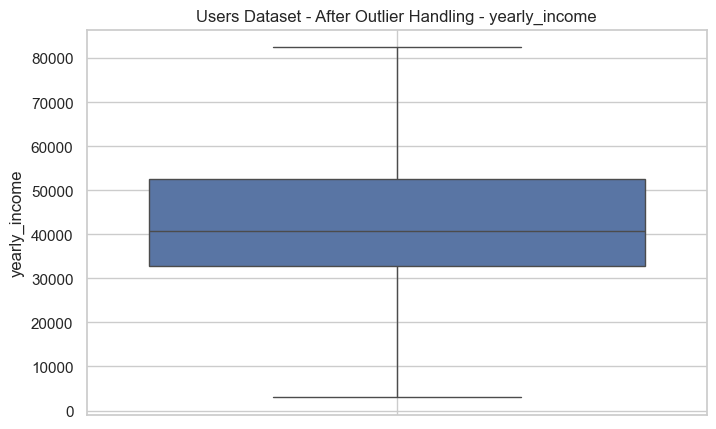

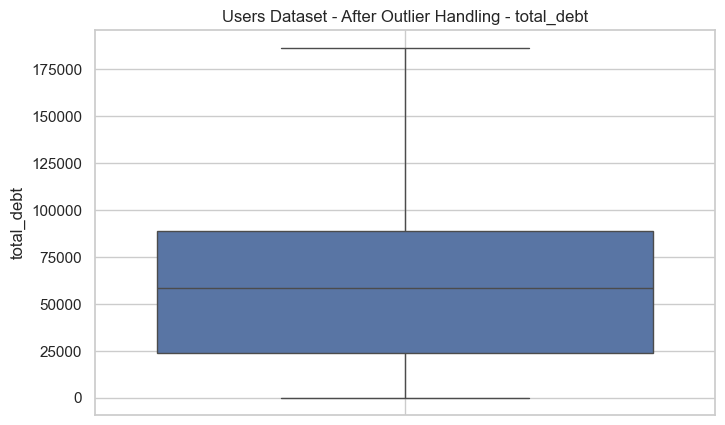

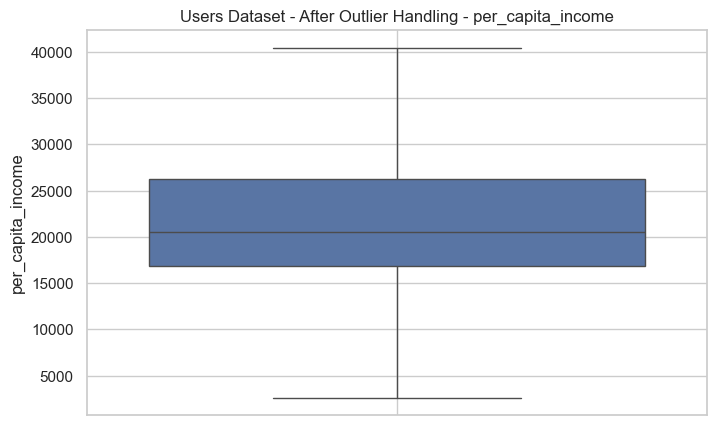

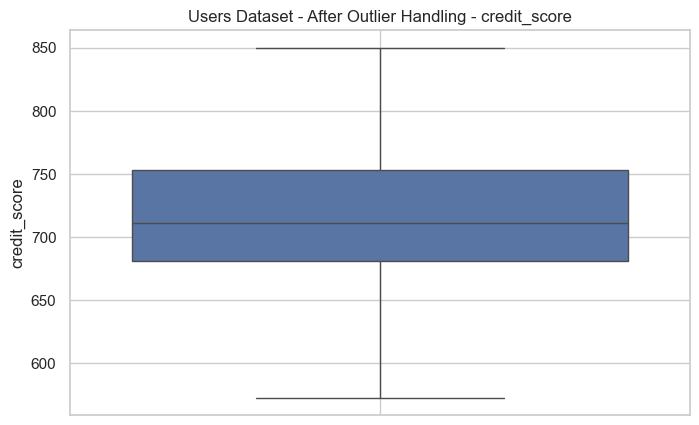

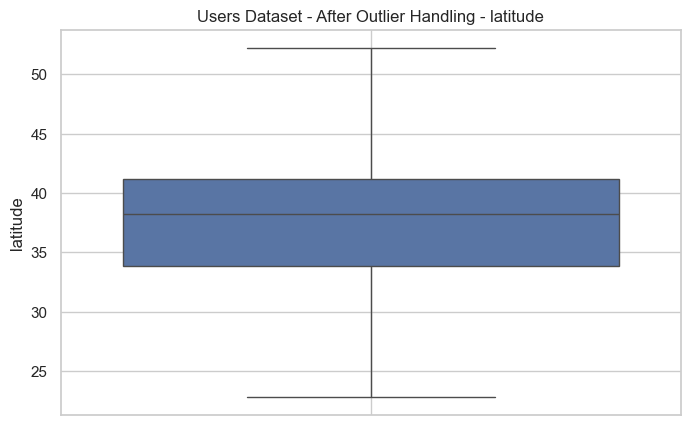

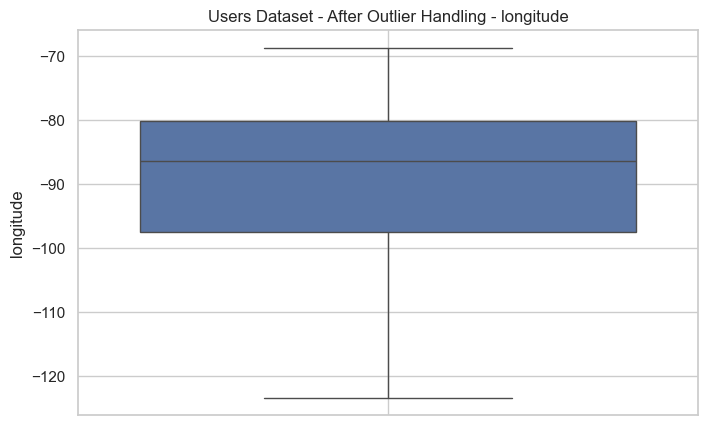

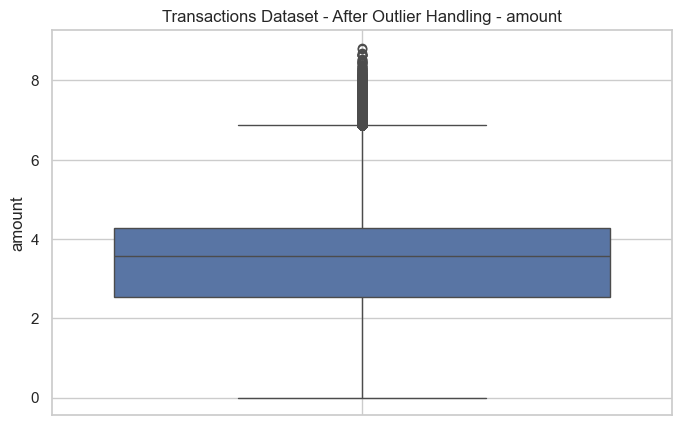

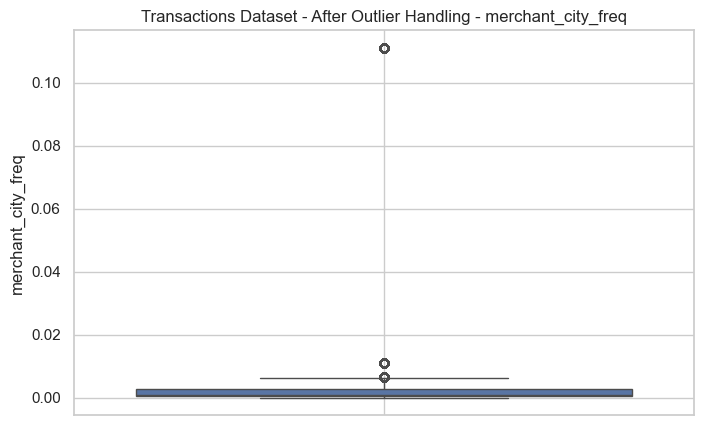

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_individual_boxplots(df, columns, title_prefix):
                              #Plots individual box plots for each specified column in the dataset.
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title(f"{title_prefix} - {col}")
        plt.ylabel(col)
        plt.grid(True)
        plt.show()

# Columns to visualize in users dataset
users_columns_to_visualize = ["yearly_income", "total_debt", "per_capita_income", "credit_score", "latitude", "longitude"]

# Columns to visualize in transactions dataset
transactions_columns_to_visualize = ["amount", "merchant_city_freq"]

# Plot individual box plots for users dataset
plot_individual_boxplots(users_df, users_columns_to_visualize, "Users Dataset - After Outlier Handling")

# Plot individual box plots for transactions dataset
plot_individual_boxplots(transactions_df, transactions_columns_to_visualize, "Transactions Dataset - After Outlier Handling")

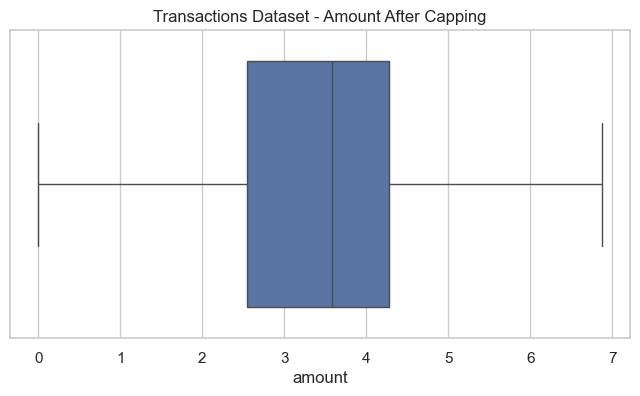

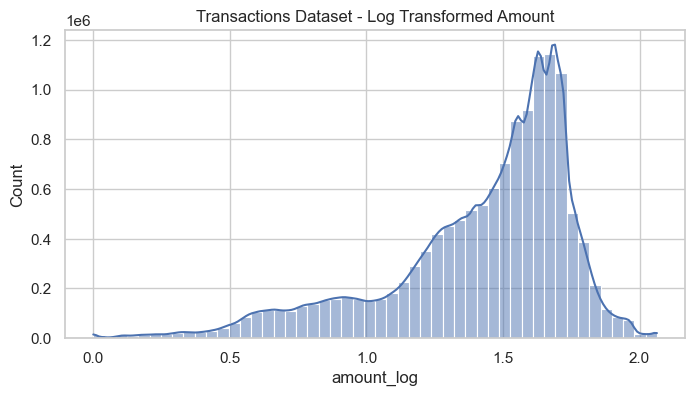

In [66]:
import numpy as np

# Define IQR limits for capping
Q1 = transactions_df['amount'].quantile(0.25)
Q3 = transactions_df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping extreme outliers
transactions_df['amount'] = np.where(transactions_df['amount'] < lower_bound, lower_bound, transactions_df['amount'])
transactions_df['amount'] = np.where(transactions_df['amount'] > upper_bound, upper_bound, transactions_df['amount'])

# Apply log transformation
transactions_df['amount_log'] = np.log1p(transactions_df['amount'])

# Plot to verify
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=transactions_df['amount'])
plt.title("Transactions Dataset - Amount After Capping")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(transactions_df['amount_log'], bins=50, kde=True)
plt.title("Transactions Dataset - Log Transformed Amount")
plt.show()

In [67]:
# Apply capping to limit extreme outliers in 'merchant_city_freq'
upper_cap = transactions_df['merchant_city_freq'].quantile(0.99)
transactions_df['merchant_city_freq'] = transactions_df['merchant_city_freq'].clip(upper=upper_cap)

print(f"Upper Cap for merchant_city_freq: {upper_cap}")

Upper Cap for merchant_city_freq: 0.11111119587737162


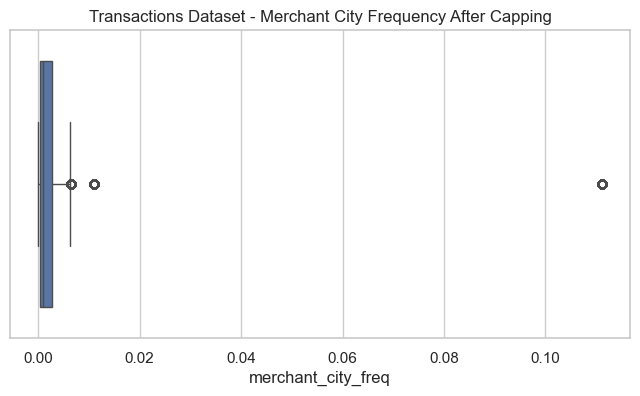

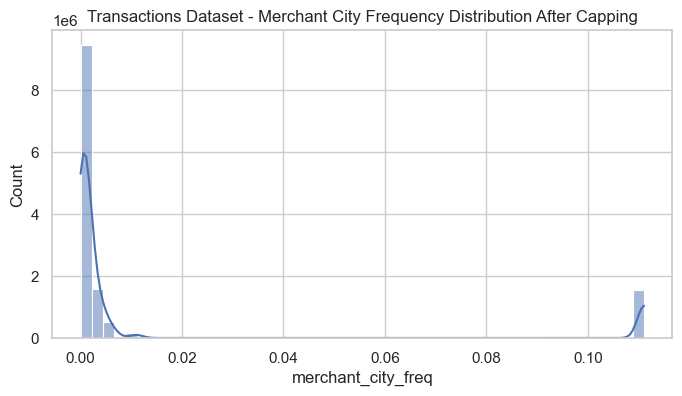

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 4))

# Boxplot after capping
sns.boxplot(x=transactions_df['merchant_city_freq'])
plt.title("Transactions Dataset - Merchant City Frequency After Capping")
plt.show()

# Histogram after capping
plt.figure(figsize=(8, 4))
sns.histplot(transactions_df['merchant_city_freq'], bins=50, kde=True)
plt.title("Transactions Dataset - Merchant City Frequency Distribution After Capping")
plt.show()

In [69]:
print("\n Checking Missing Values:")
print(transactions_df.isnull().sum())

print("\n Checking Data Types:")
print(transactions_df.dtypes)

print("\n Checking Missing Values in Users Dataset:")
print(users_df.isnull().sum())

print("\n Checking Data Types in Users Dataset:")
print(users_df.dtypes)


 Checking Missing Values:
id                             0
date                           0
client_id                      0
card_id                        0
amount                         0
merchant_id                    0
year                           0
month                          0
day                            0
weekday                        0
weekday_num                    0
is_refund                      0
mcc_freq                       0
merchant_city_freq             0
use_chip_Online Transaction    0
use_chip_Swipe Transaction     0
amount_log                     0
dtype: int64

 Checking Data Types:
id                                      int64
date                           datetime64[ns]
client_id                               int32
card_id                                 int32
amount                                float64
merchant_id                             int64
year                                    int32
month                                   int32
day     

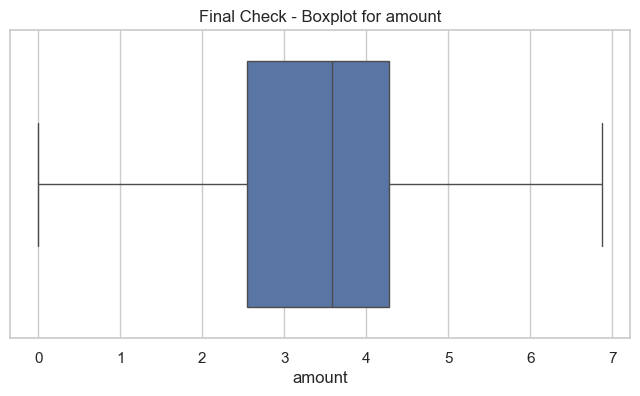

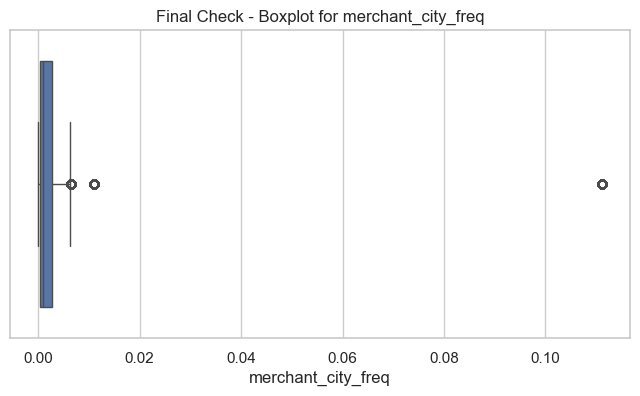

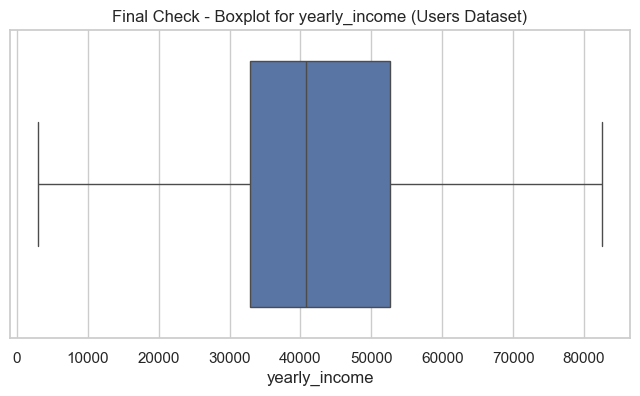

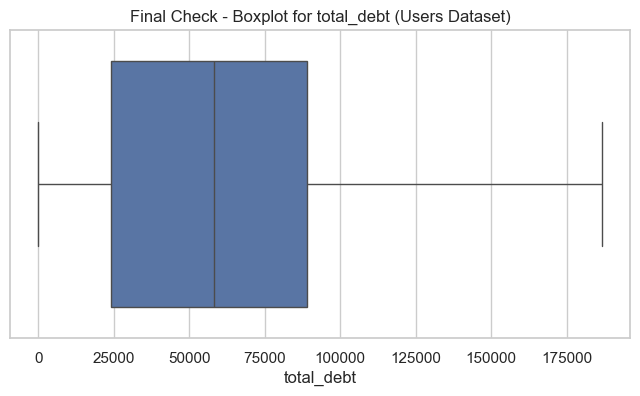

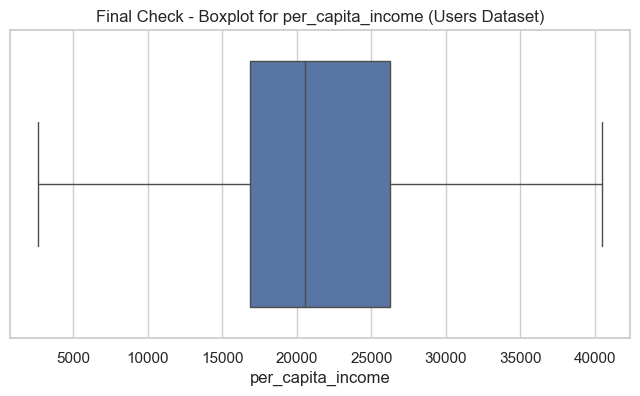

In [70]:
columns_to_check = ['amount', 'merchant_city_freq', 'yearly_income', 'total_debt', 'per_capita_income']

for col in columns_to_check:
    if col in transactions_df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=transactions_df[col])
        plt.title(f"Final Check - Boxplot for {col}")
        plt.show()
    elif col in users_df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=users_df[col])
        plt.title(f"Final Check - Boxplot for {col} (Users Dataset)")
        plt.show()

In [71]:
print(transactions_df.columns)
print(users_df.columns)

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year',
       'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq',
       'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'amount_log'],
      dtype='object')
Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male'],
      dtype='object')


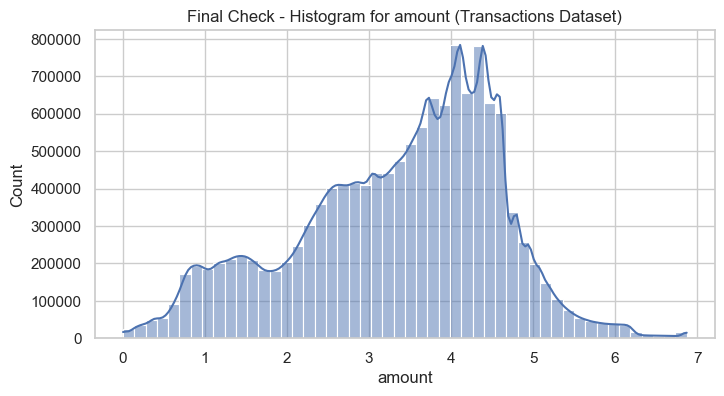

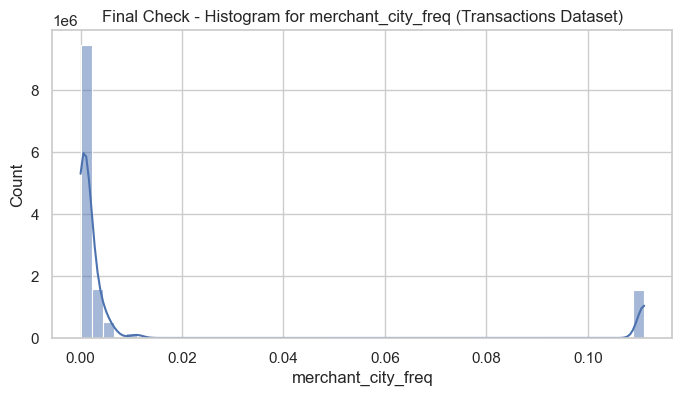

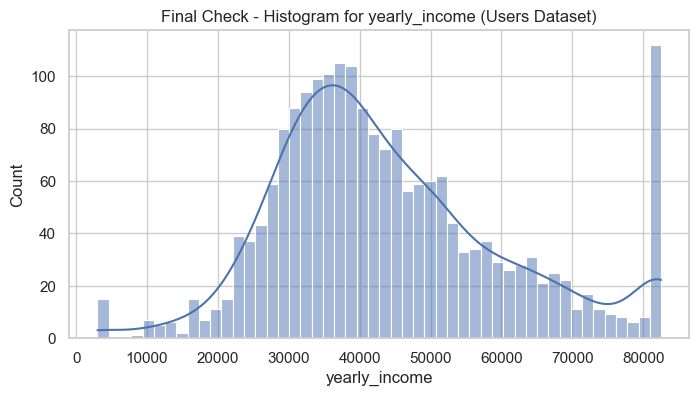

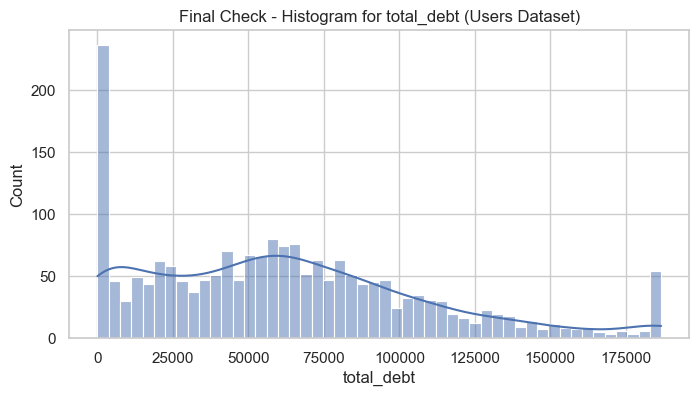

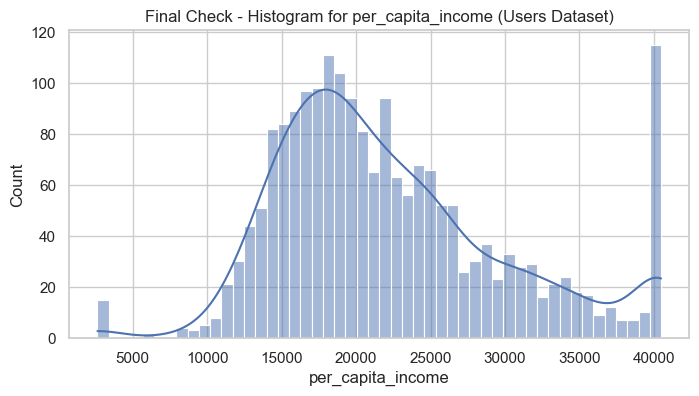

In [72]:
columns_to_check = ['amount', 'merchant_city_freq', 'yearly_income', 'total_debt', 'per_capita_income']

for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    if col in transactions_df.columns:
        sns.histplot(transactions_df[col], bins=50, kde=True)
        plt.title(f"Final Check - Histogram for {col} (Transactions Dataset)")
    elif col in users_df.columns:
        sns.histplot(users_df[col], bins=50, kde=True)
        plt.title(f"Final Check - Histogram for {col} (Users Dataset)")
    plt.show()

In [73]:
# Check categorical columns
categorical_cols = transactions_df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['weekday', 'mcc_freq'], dtype='object')


In [74]:
from sklearn.preprocessing import OrdinalEncoder

# Defining weekday order
weekday_order = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Applying Ordinal Encoding
encoder = OrdinalEncoder(categories=weekday_order)
transactions_df['weekday_encoded'] = encoder.fit_transform(transactions_df[['weekday']])

# Verify encoding
print(transactions_df[['weekday', 'weekday_encoded']].head())

  weekday  weekday_encoded
0  Friday              4.0
1  Friday              4.0
2  Friday              4.0
3  Friday              4.0
4  Friday              4.0


In [75]:
# Selecting only numerical columns
numerical_cols = transactions_df.select_dtypes(include=['int64', 'int32', 'float64'])

# Calculate skewness
skewness_values = numerical_cols.skew().sort_values(ascending=False)

# Display the skewness values
print("\n🔍 Skewness of Each Numerical Feature:\n")
print(skewness_values)


🔍 Skewness of Each Numerical Feature:

merchant_city_freq    2.365095
merchant_id           0.197251
id                    0.007505
day                   0.006501
month                 0.004146
weekday_num          -0.000833
weekday_encoded      -0.000833
year                 -0.026450
client_id            -0.084694
card_id              -0.368054
amount               -0.436763
amount_log           -1.215546
dtype: float64


In [76]:
# Checking shape of processed datasets
print("Final Shape Verification:")
print(f"Transactions Dataset: {transactions_df.shape}")  # (rows, columns)
print(f"Users Dataset: {users_df.shape}")

# Checking column names to ensure expected features exist
print("\nColumns in Transactions Dataset:")
print(transactions_df.columns.tolist())

print("\nColumns in Users Dataset:")
print(users_df.columns.tolist())

# Verifying if any dataset has duplicate rows
print("\nChecking for Duplicates:")
print(f"Transactions Dataset: {transactions_df.duplicated().sum()} duplicate rows")
print(f"Users Dataset: {users_df.duplicated().sum()} duplicate rows")

# Final check for null values
print("\nFinal Missing Values Check:")
print("Transactions Dataset:\n", transactions_df.isnull().sum())
print("\nUsers Dataset:\n", users_df.isnull().sum())

# Final summary statistics for numerical columns
print("\nFinal Dataset Summary (Transactions Dataset):")
print(transactions_df.describe())

print("\nFinal Dataset Summary (Users Dataset):")
print(users_df.describe())

Final Shape Verification:
Transactions Dataset: (13305915, 18)
Users Dataset: (2000, 13)

Columns in Transactions Dataset:
['id', 'date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year', 'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq', 'merchant_city_freq', 'use_chip_Online Transaction', 'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded']

Columns in Users Dataset:
['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male']

Checking for Duplicates:
Transactions Dataset: 0 duplicate rows
Users Dataset: 0 duplicate rows

Final Missing Values Check:
Transactions Dataset:
 id                             0
date                           0
client_id                      0
card_id                        0
amount                         0
merchant_id                    0
year                           0
month             

In [77]:
import pandas as pd
import os

# Define directory to save processed data
processed_data_dir = "data/processed_data"
os.makedirs(processed_data_dir, exist_ok=True)

# Define file paths
transactions_csv = os.path.join(processed_data_dir, "processed_transactions.csv")
transactions_pkl = os.path.join(processed_data_dir, "processed_transactions.pkl")

users_csv = os.path.join(processed_data_dir, "processed_users.csv")
users_pkl = os.path.join(processed_data_dir, "processed_users.pkl")

# Save to CSV
transactions_df.to_csv(transactions_csv, index=False)
users_df.to_csv(users_csv, index=False)

# Save to Pickle
transactions_df.to_pickle(transactions_pkl)
users_df.to_pickle(users_pkl)

print("Processed datasets saved successfully:")
print(f"Transactions Dataset - CSV: {transactions_csv}, Pickle: {transactions_pkl}")
print(f"Users Dataset - CSV: {users_csv}, Pickle: {users_pkl}")
print("Ready to proceed with Exploratory Data Analysis (EDA).")

Processed datasets saved successfully:
Transactions Dataset - CSV: data/processed_data/processed_transactions.csv, Pickle: data/processed_data/processed_transactions.pkl
Users Dataset - CSV: data/processed_data/processed_users.csv, Pickle: data/processed_data/processed_users.pkl
Ready to proceed with Exploratory Data Analysis (EDA).


In [2]:
import os

# Move one level up to the main project directory
main_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Moves up one directory

# List all files and directories in the main project directory
print(f"\n Files and Directories in '{main_dir}':\n")
for item in os.listdir(main_dir):
    item_path = os.path.join(main_dir, item)
    if os.path.isdir(item_path):
        print(f" {item} (Directory)")
    else:
        print(f" {item} (File)")


 Files and Directories in '/Users/saiajaychilakala/AI-PersonalFinanceTracker-ML':

 .DS_Store (File)
 app (Directory)
 requirements.txt (File)
 tests (Directory)
 models (Directory)
 README.md (File)
 .venv (Directory)
 scripts (Directory)
 .git (Directory)
 data (Directory)
 notebooks (Directory)
 .idea (Directory)


In [3]:
import os

# Define the path to the processed data directory
processed_data_dir = os.path.join(os.getcwd(), "..", "data", "processed_data")

# Check if the directory exists before listing files
if os.path.exists(processed_data_dir) and os.path.isdir(processed_data_dir):
    print(f"\n Files in '{processed_data_dir}':\n")
    for file in os.listdir(processed_data_dir):
        file_path = os.path.join(processed_data_dir, file)
        if os.path.isfile(file_path):
            print(f" {file} (File)")
        else:
            print(f" {file} (Directory)")
else:
    print(f" The directory '{processed_data_dir}' does not exist!")


 Files in '/Users/saiajaychilakala/AI-PersonalFinanceTracker-ML/notebooks/../data/processed_data':

 processed_users.csv (File)
 processed_transactions.pkl (File)
 .gitkeep (File)
 processed_transactions.csv (File)
 processed_users.pkl (File)


In [6]:
mcc_path = "../data/processed_data/mcc_lookup.pkl"

In [11]:
import os
import pandas as pd

mcc_path = "../data/processed_data/mcc_lookup.pkl"

# Check if the file exists before loading
if os.path.exists(mcc_path):
    mcc_data = pd.read_pickle(mcc_path)

    # Check data type
    print(f"Loaded data type: {type(mcc_data)}")

    # If it's a DataFrame, print .head()
    if isinstance(mcc_data, pd.DataFrame):
        print(mcc_data.head())
    else:
        # If it's a dictionary, print keys and sample values
        print("Loaded MCC data (Dictionary):")
        for key, value in list(mcc_data.items())[:5]:  # Show only first 5 items
            print(f"{key}: {value}")

else:
    print(f"File not found: {mcc_path}")

Loaded data type: <class 'dict'>
Loaded MCC data (Dictionary):
5812: Eating Places and Restaurants
5541: Service Stations
7996: Amusement Parks, Carnivals, Circuses
5411: Grocery Stores, Supermarkets
4784: Tolls and Bridge Fees


In [1]:
import pandas as pd

# Load Full Merged Dataset
df_merged = pd.read_csv("../data/processed_data/merged_data.csv")

# Sample 1 Million Rows with Stratification (Preserving Category Diversity)
df_sampled = df_merged.groupby('merchant_category_encoded', group_keys=False).apply(lambda x: x.sample(frac=1, random_state=42))
df_sampled = df_sampled.sample(n=1000000, random_state=42)  # Final random sample

# Save Processed Data
df_sampled.to_csv("../data/processed_data/final_processed_1M.csv", index=False)

print(" Data Processing Done! Sampled dataset saved as `final_processed_1M.csv`.")
print("New Dataset Shape:", df_sampled.shape)

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_9573/1850519747.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_merged.groupby('merchant_category_encoded', group_keys=False).apply(lambda x: x.sample(frac=1, random_state=42))


 Data Processing Done! Sampled dataset saved as `final_processed_1M.csv`.
New Dataset Shape: (1000000, 32)


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/processed_data/final_processed_1M.csv")

# Display basic info
print("\n Dataset Information:")
print(df.info())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   id                           1000000 non-null  int64  
 1   date                         1000000 non-null  object 
 2   client_id                    1000000 non-null  int64  
 3   card_id                      1000000 non-null  int64  
 4   amount                       1000000 non-null  float64
 5   merchant_id                  1000000 non-null  int64  
 6   year                         1000000 non-null  int64  
 7   month                        1000000 non-null  int64  
 8   day                          1000000 non-null  int64  
 9   weekday                      1000000 non-null  object 
 10  weekday_num                  1000000 non-null  int64  
 11  is_refund                    1000000 non-null  int64  
 12  mcc_freq            

In [4]:
# Check missing values
print("\n Missing Values Per Column:")
print(df.isna().sum())


 Missing Values Per Column:
id                             0
date                           0
client_id                      0
card_id                        0
amount                         0
merchant_id                    0
year                           0
month                          0
day                            0
weekday                        0
weekday_num                    0
is_refund                      0
mcc_freq                       0
merchant_city_freq             0
use_chip_Online Transaction    0
use_chip_Swipe Transaction     0
amount_log                     0
weekday_encoded                0
current_age                    0
retirement_age                 0
birth_year                     0
birth_month                    0
latitude                       0
longitude                      0
per_capita_income              0
yearly_income                  0
total_debt                     0
credit_score                   0
num_credit_cards               0
gender_Male   

In [5]:
# Summary statistics for numerical columns
print("\n Summary Statistics (Numerical Features):")
print(df.describe())


 Summary Statistics (Numerical Features):
                 id       client_id         card_id          amount  \
count  1.000000e+06  1000000.000000  1000000.000000  1000000.000000   
mean   1.558930e+07     1026.687032     3475.318485        3.351074   
std    4.705443e+06      581.967932     1673.936598        1.235814   
min    7.475343e+06        0.000000        0.000000        0.000000   
25%    1.151367e+07      519.000000     2413.000000        2.543961   
50%    1.557814e+07     1070.000000     3581.000000        3.577110   
75%    1.966240e+07     1531.000000     4899.000000        4.276388   
max    2.376184e+07     1998.000000     6138.000000        6.873368   

          merchant_id            year           month             day  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     47735.350496     2014.522967        6.455317       15.707439   
std      25818.902437        2.814636        3.412733        8.793952   
min          5.000000    

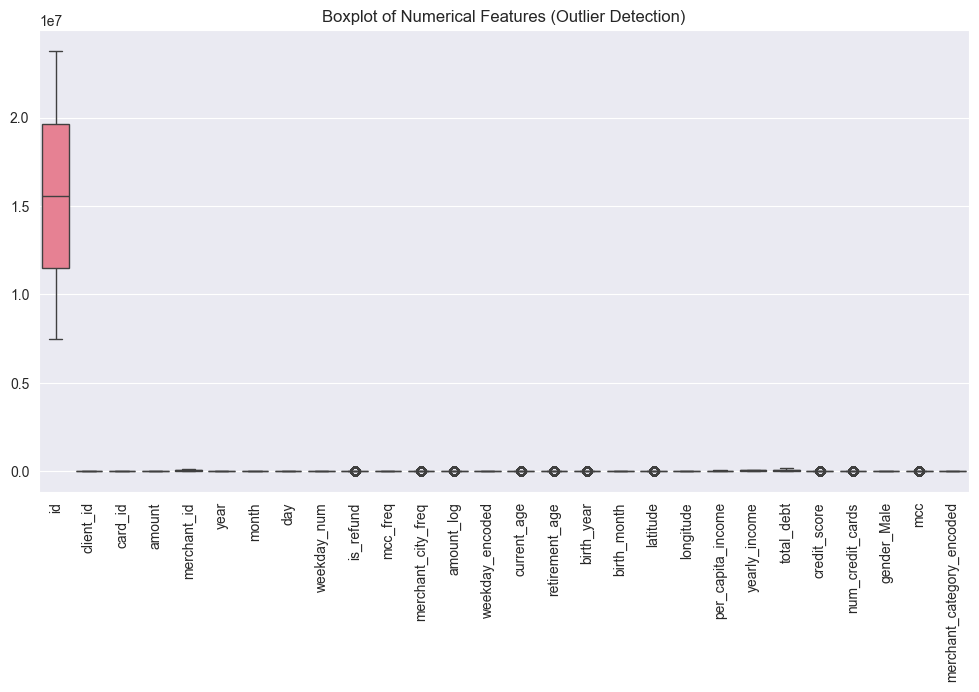

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "../data/processed_data/merged_data.csv"
df = pd.read_csv(file_path)

# Display basic info
print(" Loaded Dataset Successfully!")
print("Initial Dataset Shape:", df.shape)
print(df.head())

 Loaded Dataset Successfully!
Initial Dataset Shape: (13305915, 32)
        id                 date  client_id  card_id    amount  merchant_id  \
0  7475327  2010-01-01 00:01:00       1556     2972  4.356709        59935   
1  7475328  2010-01-01 00:02:00        561     4575  2.745346        67570   
2  7475329  2010-01-01 00:02:00       1129      102  4.394449        27092   
3  7475331  2010-01-01 00:05:00        430     2860  5.303305        27092   
4  7475332  2010-01-01 00:06:00        848     3915  3.858833        13051   

   year  month  day weekday  ...   latitude   longitude  per_capita_income  \
0  2010      1    1  Friday  ...  46.799999 -100.760002            23679.0   
1  2010      1    1  Friday  ...  40.799999  -91.120003            18076.0   
2  2010      1    1  Friday  ...  33.180000 -117.290001            16894.0   
3  2010      1    1  Friday  ...  41.419998  -87.349998            26168.0   
4  2010      1    1  Friday  ...  38.860001  -76.599998            33529.

In [6]:
# Load MCC Lookup Data
mcc_lookup_path = "../data/processed_data/mcc_lookup.csv"  # Update path if needed
mcc_lookup = pd.read_csv(mcc_lookup_path)

# Display MCC lookup table structure
print(" Loaded MCC Lookup Data!")
print(mcc_lookup.head())

# Ensure column names are correct
print("MCC Lookup Columns:", mcc_lookup.columns)

 Loaded MCC Lookup Data!
   mcc_code                       mcc_description
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees
MCC Lookup Columns: Index(['mcc_code', 'mcc_description'], dtype='object')


In [7]:
# Rename columns for consistency
mcc_lookup.rename(columns={"mcc_code": "mcc", "mcc_description": "mcc_category"}, inplace=True)

# Merge MCC Category into df_sampled
df_sampled = df_sampled.merge(mcc_lookup, on="mcc", how="left")

print(" MCC Category Merged Successfully!")
print("After Merging Shape:", df_sampled.shape)
print(df_sampled.head())

 MCC Category Merged Successfully!
After Merging Shape: (500000, 33)
         id                 date  client_id  card_id    amount  merchant_id  \
0  11978328  2012-11-23 16:03:00        619     3348  5.577577        54850   
1  11363233  2012-07-07 13:57:00        456     4576  3.670206        68135   
2   8117710  2010-06-10 16:59:00        209     4676  3.980989        81833   
3  12606562  2013-04-13 12:08:00       1605     1133  3.713572        27092   
4  12628171  2013-04-18 10:00:00        144     5247  1.719189        44578   

   year  month  day   weekday  ...   longitude  per_capita_income  \
0  2012     11   23    Friday  ...  -92.470001            26478.0   
1  2012      7    7  Saturday  ...  -81.989998            17140.0   
2  2010      6   10  Thursday  ... -106.150002            14322.0   
3  2013      4   13  Saturday  ...  -84.370003            19293.0   
4  2013      4   18  Thursday  ...  -93.050003            15857.0   

   yearly_income  total_debt  credit_scor

In [8]:
# Save the updated merged data
merged_data_path = "../data/processed_data/merged_data.csv"

df_sampled.to_csv(merged_data_path, index=False)

print(f" Updated merged data saved successfully to {merged_data_path}")

 Updated merged data saved successfully to ../data/processed_data/merged_data.csv


In [10]:
# Reload the updated merged data
file_path = "../data/processed_data/merged_data.csv"
df = pd.read_csv(file_path)

# Check dataset structure and completeness
print(" Merged Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)  # Check total number of rows & columns
print("\n First Few Rows:")
print(df.head())  # Display first few rows

# Check for missing values
print("\n Missing Values Summary:")
print(df.isnull().sum())

# Check if MCC category is properly merged
print("\n Unique MCC Categories:")
print(df["mcc_category"].unique())

# Check column names
print("\n Columns in Dataset:")
print(df.columns)

 Merged Dataset Loaded Successfully!
Dataset Shape: (500000, 33)

 First Few Rows:
         id                 date  client_id  card_id    amount  merchant_id  \
0  11978328  2012-11-23 16:03:00        619     3348  5.577577        54850   
1  11363233  2012-07-07 13:57:00        456     4576  3.670206        68135   
2   8117710  2010-06-10 16:59:00        209     4676  3.980989        81833   
3  12606562  2013-04-13 12:08:00       1605     1133  3.713572        27092   
4  12628171  2013-04-18 10:00:00        144     5247  1.719189        44578   

   year  month  day   weekday  ...   longitude  per_capita_income  \
0  2012     11   23    Friday  ...  -92.470001            26478.0   
1  2012      7    7  Saturday  ...  -81.989998            17140.0   
2  2010      6   10  Thursday  ... -106.150002            14322.0   
3  2013      4   13  Saturday  ...  -84.370003            19293.0   
4  2013      4   18  Thursday  ...  -93.050003            15857.0   

   yearly_income  total_deb

In [16]:
import pandas as pd

# Load dataset
file_path = "../data/processed_data/merged_data.csv"
df = pd.read_csv(file_path)

# Reconstruct 'date' column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Compute monthly income from yearly income
df['monthly_income'] = df['yearly_income'] / 12

# Compute Monthly Average Spend per User
df['monthly_avg_spend'] = df.groupby(['client_id', df['date'].dt.to_period('M')])['amount'].transform('mean')

# Compute Spending Ratio (Amount / Monthly Income)
df['spending_ratio'] = df['amount'] / df['monthly_income']

# Compute Transactions in the Last 30 Days (Fix: Rolling must use `date` inside groupby)
df['num_transactions_last_30_days'] = df.groupby('client_id')['date'].transform(lambda x: x.sort_values().diff().dt.days.rolling(30).count())

# Compute Category Spending Ratio
df['category_spending_ratio'] = df['amount'] / df.groupby('client_id')['amount'].transform('sum')

# Compute Last 3 Months Average Spending (Fix: Ensure correct rolling operation)
df['last_3_months_avg_spend'] = df.groupby('client_id')['amount'].transform(lambda x: x.rolling(window=90, min_periods=1).mean())

# Handle New Users (Fill missing data)
df['last_3_months_avg_spend'].fillna(df.groupby('mcc_category')['amount'].transform('mean'), inplace=True)
df.loc[:, 'spending_ratio'] = df['spending_ratio'].fillna(df['spending_ratio'].mean())

# Save the updated dataset
output_path = "../data/processed_data/final_selected_features.csv"
df.to_csv(output_path, index=False)

print(f" Final selected features saved successfully to {output_path}")

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_4362/2057334131.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_3_months_avg_spend'].fillna(df.groupby('mcc_category')['amount'].transform('mean'), inplace=True)


 Final selected features saved successfully to ../data/processed_data/final_selected_features.csv


In [18]:
import pandas as pd

# Load the final processed file
file_path = "../data/processed_data/final_selected_features.csv"
df = pd.read_csv(file_path)

# Display basic info
print(" Final Selected Features Loaded Successfully!")
print("Dataset Shape:", df.shape)  # Should be (500000, X)
print("\n First Few Rows:")
print(df.head())

# Check for missing values
print("\n Missing Values Summary:")
print(df.isnull().sum())

# Check column names
print("\n Columns in Dataset:")
print(df.columns)

 Final Selected Features Loaded Successfully!
Dataset Shape: (500000, 39)

 First Few Rows:
         id        date  client_id  card_id    amount  merchant_id  year  \
0  11978328  2012-11-23        619     3348  5.577577        54850  2012   
1  11363233  2012-07-07        456     4576  3.670206        68135  2012   
2   8117710  2010-06-10        209     4676  3.980989        81833  2010   
3  12606562  2013-04-13       1605     1133  3.713572        27092  2013   
4  12628171  2013-04-18        144     5247  1.719189        44578  2013   

   month  day   weekday  ...  gender_Male   mcc  merchant_category_encoded  \
0     11   23    Friday  ...            1  4814                         97   
1      7    7  Saturday  ...            1  5411                         45   
2      6   10  Thursday  ...            0  5912                         33   
3      4   13  Saturday  ...            1  4829                         70   
4      4   18  Thursday  ...            0  5812              

In [19]:
df['num_transactions_last_30_days'].fillna(0, inplace=True)

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_4362/3389561455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num_transactions_last_30_days'].fillna(0, inplace=True)


In [20]:
print(df['num_transactions_last_30_days'].isnull().sum())  # Should print 0

0


In [21]:
df.to_csv("../data/processed_data/final_selected_features.csv", index=False)
print(" Final file updated and saved successfully!")

 Final file updated and saved successfully!


In [22]:
# Check for missing values
print("\n Missing Values Summary:")
print(df.isnull().sum())


 Missing Values Summary:
id                               0
date                             0
client_id                        0
card_id                          0
amount                           0
merchant_id                      0
year                             0
month                            0
day                              0
weekday                          0
weekday_num                      0
is_refund                        0
mcc_freq                         0
merchant_city_freq               0
use_chip_Online Transaction      0
use_chip_Swipe Transaction       0
amount_log                       0
weekday_encoded                  0
current_age                      0
retirement_age                   0
birth_year                       0
birth_month                      0
latitude                         0
longitude                        0
per_capita_income                0
yearly_income                    0
total_debt                       0
credit_score                 

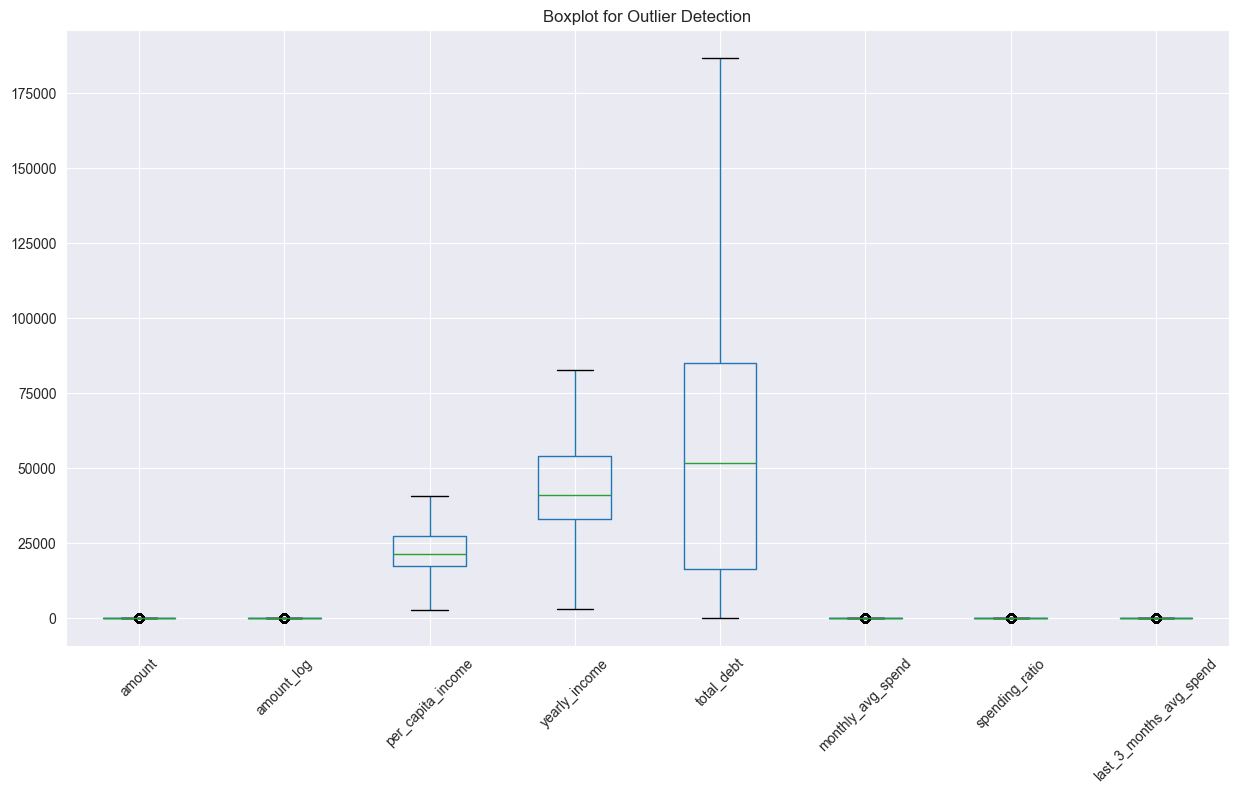

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
file_path = "../data/processed_data/final_selected_features.csv"
df = pd.read_csv(file_path)

# Select numerical features for outlier detection
num_features = ["amount", "amount_log", "per_capita_income", "yearly_income",
                "total_debt", "monthly_avg_spend", "spending_ratio", "last_3_months_avg_spend"]

# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
df[num_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

 Skewness of Numerical Features:
 amount                    -0.433066
amount_log                -1.212812
per_capita_income          0.680047
yearly_income              0.588768
total_debt                 0.786345
monthly_avg_spend         -0.476866
spending_ratio             8.139243
last_3_months_avg_spend   -0.508996
dtype: float64


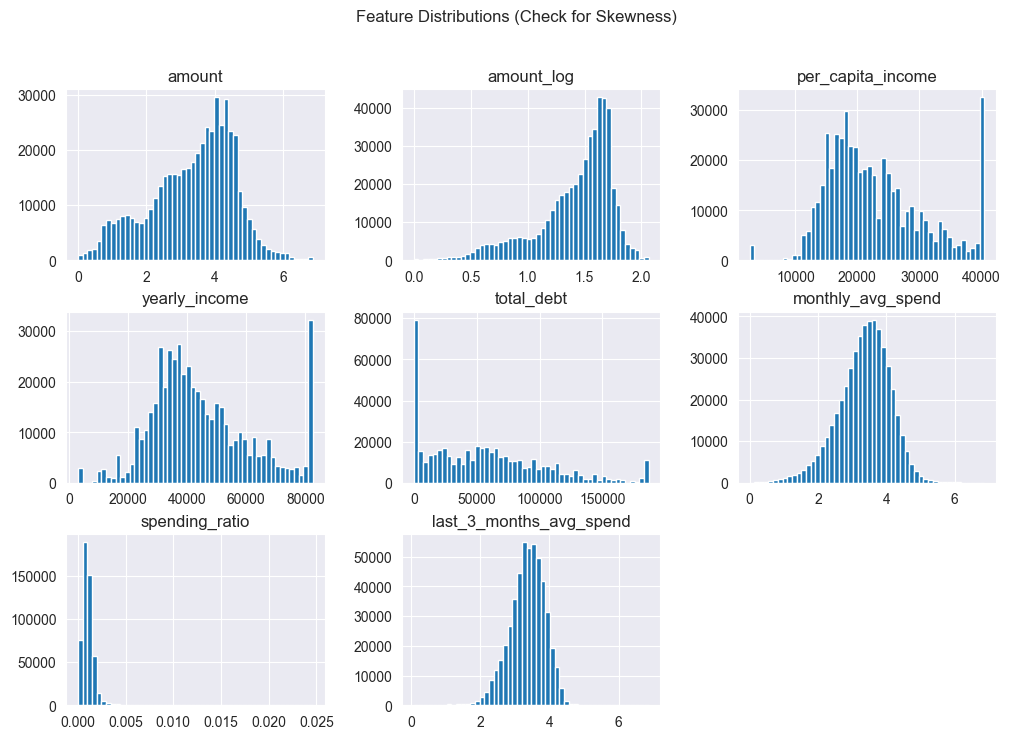

In [25]:
from scipy.stats import skew

# Calculate skewness for numerical columns
skewness = df[num_features].apply(lambda x: skew(x.dropna()))
print(" Skewness of Numerical Features:\n", skewness)

# Plot histogram for skewed features
df[num_features].hist(figsize=(12, 8), bins=50)
plt.suptitle("Feature Distributions (Check for Skewness)")
plt.show()

 Spending Category Distribution:
 mcc_category
Grocery Stores, Supermarkets             0.120116
Miscellaneous Food Stores                0.109492
Service Stations                         0.107622
Eating Places and Restaurants            0.074860
Drug Stores and Pharmacies               0.057696
                                           ...   
Coated and Laminated Products            0.000026
Floor Covering Stores                    0.000024
Bolt, Nut, Screw, Rivet Manufacturing    0.000024
Household Appliance Stores               0.000018
Cruise Lines                             0.000014
Name: proportion, Length: 108, dtype: float64


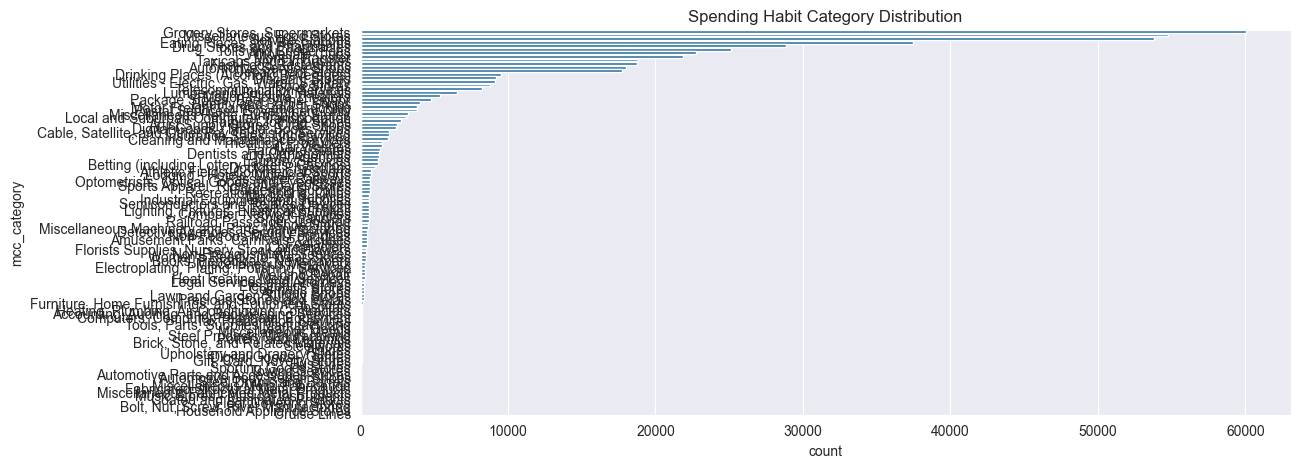

In [26]:
# Check category distribution
print(" Spending Category Distribution:\n", df['mcc_category'].value_counts(normalize=True))

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.countplot(y=df['mcc_category'], order=df['mcc_category'].value_counts().index)
plt.title("Spending Habit Category Distribution")
plt.show()

In [27]:
# Define a function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping
outlier_cols = ["total_debt", "yearly_income", "spending_ratio"]
for col in outlier_cols:
    cap_outliers(df, col)

print(" Outliers capped successfully.")

 Outliers capped successfully.


In [28]:
# Apply log transformation to skewed features
skewed_features = ["spending_ratio", "total_debt"]

for feature in skewed_features:
    df[feature] = df[feature].apply(lambda x: np.log1p(x) if x > 0 else 0)

print(" Skewness corrected for:", skewed_features)

 Skewness corrected for: ['spending_ratio', 'total_debt']


In [29]:
# Define a threshold for rare categories
category_threshold = 0.005  # Categories with less than 0.5% of transactions

# Get category proportions
category_proportions = df['mcc_category'].value_counts(normalize=True)

# Identify rare categories
rare_categories = category_proportions[category_proportions < category_threshold].index

# Replace rare categories with "Other"
df['mcc_category'] = df['mcc_category'].apply(lambda x: "Other" if x in rare_categories else x)

print(" Rare categories grouped into 'Other'.")

 Rare categories grouped into 'Other'.


In [30]:
# Save the cleaned dataset
output_path = "../data/processed_data/final_selected_features_cleaned.csv"
df.to_csv(output_path, index=False)

print(f" Cleaned dataset saved successfully to {output_path}")

 Cleaned dataset saved successfully to ../data/processed_data/final_selected_features_cleaned.csv


In [31]:
# Verify that changes are applied
print("Dataset Summary After Cleaning:")
print(df.describe())
print("Unique Spending Categories:", df["mcc_category"].nunique())

Dataset Summary After Cleaning:
                 id      client_id        card_id         amount  \
count  5.000000e+05  500000.000000  500000.000000  500000.000000   
mean   1.558201e+07    1028.409308    3473.368920       3.351408   
std    4.701766e+06     581.964981    1674.547571       1.237276   
min    7.475357e+06       0.000000       0.000000       0.000000   
25%    1.150306e+07     520.000000    2412.000000       2.546315   
50%    1.556464e+07    1073.000000    3583.000000       3.575431   
75%    1.964726e+07    1533.000000    4892.000000       4.275415   
max    2.376187e+07    1998.000000    6138.000000       6.873368   

         merchant_id           year          month            day  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean    47792.247584    2014.519164       6.449514      15.715042   
std     25840.988881       2.811805       3.411578       8.788537   
min         5.000000    2010.000000       1.000000       1.000000   
25%     25

In [34]:
import pandas as pd

# Define the required features, replacing 'mcc_description' with 'mcc_category'
selected_features = [
    "date", "amount", "year", "month", "day", "weekday_num", "is_refund",
    "amount_log", "per_capita_income", "yearly_income", "total_debt",
    "mcc", "mcc_category", "merchant_category_encoded",
    "monthly_income", "monthly_avg_spend", "spending_ratio",
    "num_transactions_last_30_days", "category_spending_ratio", "last_3_months_avg_spend"
]

# Load the full dataset
file_path = "../data/processed_data/final_selected_features_cleaned.csv"
df = pd.read_csv(file_path)

# Check existing columns
existing_columns = df.columns

# Retain only the features that exist in the dataset
available_features = [col for col in selected_features if col in existing_columns]

# Select the available features
df = df[available_features]

# Save the cleaned dataset back to the same file
df.to_csv(file_path, index=False)

print(f" Filtered dataset saved successfully! New Shape: {df.shape}")
df.head()

 Filtered dataset saved successfully! New Shape: (500000, 20)


,date,amount,year,month,day,weekday_num,is_refund,amount_log,per_capita_income,yearly_income,total_debt,mcc,mcc_category,merchant_category_encoded,monthly_income,monthly_avg_spend,spending_ratio,num_transactions_last_30_days,category_spending_ratio,last_3_months_avg_spend
0,2012-11-23,5.577577,2012,11,23,4,0,1.883666,26478.0,53986.0,10.974763,4814,Telecommunication Services,97,4498.833333,4.900377,0.001239,30.0,0.004874,5.577577
1,2012-07-07,3.670206,2012,7,7,5,0,1.541203,17140.0,34947.0,10.800086,5411,"Grocery Stores, Supermarkets",45,2912.250000,3.243406,0.001259,30.0,0.001977,3.670206
2,2010-06-10,3.980989,2010,6,10,3,0,1.605629,14322.0,29206.0,10.164582,5912,Drug Stores and Pharmacies,33,2433.833333,4.277509,0.001634,0.0,0.003071,3.980989
3,2013-04-13,3.713572,2013,4,13,5,0,1.550446,19293.0,39336.0,10.686201,4829,Money Transfer,70,3278.000000,3.713572,0.001132,30.0,0.003326,3.713572
4,2013-04-18,1.719189,2013,4,18,3,0,1.000334,15857.0,32330.0,11.484433,5812,Eating Places and Restaurants,34,2694.166667,3.235981,0.000638,30.0,0.000988,1.719189


In [35]:
print(df.columns)

Index(['date', 'amount', 'year', 'month', 'day', 'weekday_num', 'is_refund',
       'amount_log', 'per_capita_income', 'yearly_income', 'total_debt', 'mcc',
       'mcc_category', 'merchant_category_encoded', 'monthly_income',
       'monthly_avg_spend', 'spending_ratio', 'num_transactions_last_30_days',
       'category_spending_ratio', 'last_3_months_avg_spend'],
      dtype='object')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the merged dataset
file_path = "../data/processed_data/merged_data.csv"
df = pd.read_csv(file_path)

# Ensure the dataset is large enough
print(f"Original Dataset Shape: {df.shape}")

# Check if 'mcc_category' exists for stratified sampling
if 'mcc_category' in df.columns:
    # Stratified sampling to maintain category balance
    df_sampled, _ = train_test_split(df, test_size=(1 - 150000 / len(df)), stratify=df['mcc_category'], random_state=42)
else:
    # Random sampling if 'mcc_category' is missing
    df_sampled = df.sample(n=150000, random_state=42)

# Save the reduced dataset
reduced_file_path = "../data/processed_data/reduced_merged_data.csv"
df_sampled.to_csv(reduced_file_path, index=False)

print(f"Reduced Dataset Shape: {df_sampled.shape}")
print(f"Reduced dataset saved at: {reduced_file_path}")

Original Dataset Shape: (500000, 33)
Reduced Dataset Shape: (150000, 33)
Reduced dataset saved at: ../data/processed_data/reduced_merged_data.csv


In [4]:
df.head()

,id,date,client_id,card_id,amount,merchant_id,year,month,day,weekday,...,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,gender_Male,mcc,merchant_category_encoded,mcc_category
0,11978328,2012-11-23 16:03:00,619,3348,5.577577,54850,2012,11,23,Friday,...,-92.470001,26478.0,53986.0,58381.0,748.0,4,1,4814,97,Telecommunication Services
1,11363233,2012-07-07 13:57:00,456,4576,3.670206,68135,2012,7,7,Saturday,...,-81.989998,17140.0,34947.0,49024.0,751.0,3,1,5411,45,"Grocery Stores, Supermarkets"
2,8117710,2010-06-10 16:59:00,209,4676,3.980989,81833,2010,6,10,Thursday,...,-106.150002,14322.0,29206.0,25966.0,716.0,6,0,5912,33,Drug Stores and Pharmacies
3,12606562,2013-04-13 12:08:00,1605,1133,3.713572,27092,2013,4,13,Saturday,...,-84.370003,19293.0,39336.0,43747.0,690.0,3,1,4829,70,Money Transfer
4,12628171,2013-04-18 10:00:00,144,5247,1.719189,44578,2013,4,18,Thursday,...,-93.050003,15857.0,32330.0,97190.0,835.0,4,0,5812,34,Eating Places and Restaurants


In [5]:
print(df.columns)

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year',
       'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq',
       'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded',
       'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male', 'mcc',
       'merchant_category_encoded', 'mcc_category'],
      dtype='object')


In [16]:
import pandas as pd
import random

# Load the dataset
file_path = "../data/processed_data/reduced_merged_data.csv"
df = pd.read_csv(file_path)

# Define user-style descriptions for each MCC category
description_templates = {
    "Eating Places and Restaurants": [
        "Dinner at restaurant", "Lunch with friends", "Food delivery", "Café visit", "Dine-in experience"
    ],
    "Service Stations": [
        "Gas station refill", "Fuel purchase", "Paid for petrol", "Diesel purchase", "Car refueling"
    ],
    "Amusement Parks, Carnivals, Circuses": [
        "Visited amusement park", "Rode carnival rides", "Paid for circus tickets", "Theme park entry"
    ],
    "Grocery Stores, Supermarkets": [
        "Bought groceries", "Supermarket shopping", "Weekly grocery run", "Grocery payment"
    ],
    "Tolls and Bridge Fees": [
        "Toll road payment", "Bridge toll fee", "Paid highway toll", "Electronic toll deduction"
    ],
    "Utilities - Electric, Gas, Water, Sanitary": [
        "Paid electricity bill", "Water bill payment", "Gas utility payment", "Monthly utility expenses"
    ],
    "Book Stores": [
        "Purchased books", "Bought a magazine", "Paid for an ebook", "Bookstore purchase"
    ],
    "Fast Food Restaurants": [
        "Quick lunch order", "Drive-thru meal", "Fast food payment", "Ordered fast food"
    ],
    "Money Transfer": [
        "Sent money online", "Wire transfer", "Bank transfer transaction", "Fund transfer"
    ],
    "Department Stores": [
        "Department store shopping", "Bought home essentials", "Clothing and accessories purchase"
    ],
    "Lumber and Building Materials": [
        "Purchased home improvement supplies", "Bought construction materials", "DIY project shopping"
    ],
    "Discount Stores": [
        "Discount store purchase", "Bargain shopping", "Bulk purchase", "Retail discount payment"
    ],
    "Computer Network Services": [
        "Internet service payment", "Broadband recharge", "Network subscription renewal"
    ],
    "Miscellaneous Food Stores": [
        "Bought organic products", "Visited a health food store", "Purchased snacks"
    ],
    "Taxicabs and Limousines": [
        "Cab fare payment", "Taxi ride", "Booked a limousine", "Ride-sharing service"
    ],
    "Wholesale Clubs": [
        "Bulk shopping", "Warehouse club purchase", "Membership-based shopping"
    ],
    "Drinking Places (Alcoholic Beverages)": [
        "Bar visit", "Ordered alcoholic drinks", "Wine tasting experience"
    ],
    "Medical Services": [
        "Doctor’s consultation fee", "Paid for medical services", "Hospital bill payment"
    ],
    "Electronics Stores": [
        "Purchased new gadget", "Bought a laptop", "Smartphone shopping"
    ],
    "Railroad Passenger Transport": [
        "Train ticket purchase", "Booked rail transport", "Railway journey expense"
    ],
    "Recreational Sports, Clubs": [
        "Sports club membership", "Gym subscription", "Fitness club fee"
    ],
    "Gift, Card, Novelty Stores": [
        "Bought a greeting card", "Gift shop purchase", "Purchased souvenirs"
    ],
    "Cruise Lines": [
        "Booked a cruise trip", "Paid for a cruise tour", "Luxury cruise expense"
    ],
    "Heating, Plumbing, Air Conditioning Contractors": [
        "Paid for plumbing services", "HVAC maintenance payment", "Heating system repair"
    ],
    "Insurance Sales, Underwriting": [
        "Paid for insurance", "Renewed insurance policy", "Health insurance premium"
    ],
    "Florists Supplies, Nursery Stock and Flowers": [
        "Bought fresh flowers", "Florist shop purchase", "Ordered floral arrangements"
    ],
    "Hardware Stores": [
        "Bought home repair items", "Hardware tools purchase", "DIY home improvement shopping"
    ],
    "Miscellaneous Fabricated Metal Products": [
        "Metalwork purchase", "Industrial materials payment", "Construction metal supplies"
    ],
    "Automotive Body Repair Shops": [
        "Car repair service", "Vehicle bodywork payment", "Auto shop transaction"
    ],
    "Music Stores - Musical Instruments": [
        "Purchased a musical instrument", "Bought a guitar", "Music store shopping"
    ]
}

# Ensure all categories are covered
missing_categories = set(df["mcc_category"].unique()) - set(description_templates.keys())

# Auto-generate a general description for missing categories
for category in missing_categories:
    description_templates[category] = [
        f"Payment related to {category}", f"Transaction in {category}", f"Purchased from {category}"
    ]

# Assign descriptions based on MCC category
df["transaction_description"] = df["mcc_category"].apply(lambda x: random.choice(description_templates[x]))

# Save updated dataset
updated_file_path = "../data/processed_data/reduced_merged_data.csv"
df.to_csv(updated_file_path, index=False)

# Print verification
print(f"Updated dataset saved at: {updated_file_path}")
print(df[["mcc_category", "transaction_description"]].head(10))

Updated dataset saved at: ../data/processed_data/reduced_merged_data.csv
                            mcc_category         transaction_description
0                Taxicabs and Limousines                       Taxi ride
1              Miscellaneous Food Stores                Purchased snacks
2  Drinking Places (Alcoholic Beverages)         Wine tasting experience
3                            Book Stores                 Purchased books
4           Grocery Stores, Supermarkets              Weekly grocery run
5                  Fast Food Restaurants               Ordered fast food
6                        Cosmetic Stores  Purchased from Cosmetic Stores
7                       Service Stations                   Car refueling
8                       Service Stations                   Fuel purchase
9                  Fast Food Restaurants                 Drive-thru meal


In [17]:
print(df.columns)

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year',
       'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq',
       'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded',
       'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male', 'mcc',
       'merchant_category_encoded', 'mcc_category', 'transaction_description'],
      dtype='object')


In [19]:
# Check for missing values in mcc_category_encoded
missing_encoded = df[df["merchant_category_encoded"].isnull()]["mcc_category"].unique()
print("Categories missing encoded values:", missing_encoded)

Categories missing encoded values: []


In [21]:
# Checking if each transaction description has a unique corresponding encoded value
description_mapping = df.groupby("transaction_description")["merchant_category_encoded"].nunique()
multiple_mappings_desc = description_mapping[description_mapping > 1]
print("Descriptions mapping to multiple encoded values:", multiple_mappings_desc)

Descriptions mapping to multiple encoded values: Series([], Name: merchant_category_encoded, dtype: int64)


In [29]:
# Check if each mcc_category has a unique encoded value
category_mapping = df.groupby("mcc_category")["merchant_category_encoded"].nunique()
multiple_mappings = category_mapping[category_mapping > 1]

print("Categories with multiple encoded values:", multiple_mappings)

Categories with multiple encoded values: Series([], Name: merchant_category_encoded, dtype: int64)


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "../data/processed_data/reduced_merged_data.csv"
df = pd.read_csv(file_path)

#  Drop Unnecessary Columns**
drop_columns = [
    "id", "client_id", "card_id",  # Identifiers
    "merchant_id", "merchant_city_freq",  # Merchant-related, not useful
    "use_chip_Online Transaction", "use_chip_Swipe Transaction",  # Transaction type details
    "latitude", "longitude",  # Location data (not relevant)
    "credit_score", "num_credit_cards", "gender_Male",  # User-specific details
    "current_age", "retirement_age", "birth_year", "birth_month"  # Age-related columns (not useful)
]

df = df.drop(columns=drop_columns, errors='ignore')
print(" Unnecessary columns dropped. Remaining columns:", df.columns)

 Unnecessary columns dropped. Remaining columns: Index(['date', 'amount', 'year', 'month', 'day', 'weekday', 'weekday_num',
       'is_refund', 'mcc_freq', 'amount_log', 'weekday_encoded',
       'per_capita_income', 'yearly_income', 'total_debt', 'mcc',
       'merchant_category_encoded', 'mcc_category', 'transaction_description'],
      dtype='object')


In [31]:
# Handle Missing Values**
missing_values = df.isnull().sum()
print(" Missing values per column before handling:\n", missing_values[missing_values > 0])

 Missing values per column before handling:
 Series([], dtype: int64)


In [33]:
# Check if weekday_encoded is just a float version of weekday_num
same_values = (df["weekday_num"].astype(float) == df["weekday_encoded"]).all()

if same_values:
    print(" 'weekday_encoded' is just a float version of 'weekday_num'. We can drop 'weekday_encoded'.")
else:
    print("️ 'weekday_encoded' is different from 'weekday_num'. Investigate further before dropping.")

 'weekday_encoded' is just a float version of 'weekday_num'. We can drop 'weekday_encoded'.


In [34]:
df.drop(columns=["weekday_encoded"], inplace=True)
print(" Dropped 'weekday_encoded', keeping 'weekday_num' for consistency.")

 Dropped 'weekday_encoded', keeping 'weekday_num' for consistency.


In [35]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical columns to encode:", categorical_cols)

Categorical columns to encode: Index(['date', 'weekday', 'mcc_category', 'transaction_description'], dtype='object')


In [36]:
df.drop(columns=["weekday"], inplace=True)
print("Dropped 'weekday', keeping other categorical columns.")
print("Remaining columns:", df.columns)

Dropped 'weekday', keeping other categorical columns.
Remaining columns: Index(['date', 'amount', 'year', 'month', 'day', 'weekday_num', 'is_refund',
       'mcc_freq', 'amount_log', 'per_capita_income', 'yearly_income',
       'total_debt', 'mcc', 'merchant_category_encoded', 'mcc_category',
       'transaction_description'],
      dtype='object')


In [37]:
print(df[["mcc_freq", "per_capita_income", "yearly_income", "total_debt"]].dtypes)

mcc_freq             float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
dtype: object


In [38]:
print(df[["mcc_freq", "per_capita_income", "yearly_income", "total_debt"]].describe())

            mcc_freq  per_capita_income  yearly_income     total_debt
count  150000.000000      150000.000000  150000.000000  150000.000000
mean        0.061277       22948.493673   44723.422153   56650.533228
std         0.040969        7898.504231   17113.436985   46905.314935
min         0.000024        2632.250000    2998.500000       0.000000
25%         0.035727       17113.000000   32817.000000   16437.000000
50%         0.050664       21159.000000   41091.000000   51679.000000
75%         0.107074       27308.000000   54013.000000   84949.000000
max         0.119690       40478.250000   82518.500000  186696.125000


In [39]:
print(df[["mcc_freq", "per_capita_income", "yearly_income", "total_debt"]].isnull().sum())

mcc_freq             0
per_capita_income    0
yearly_income        0
total_debt           0
dtype: int64


In [40]:
print(df["amount_log"].describe())
print(df["amount_log"].isnull().sum())

count    150000.000000
mean          1.419006
std           0.340785
min           0.000000
25%           1.264801
50%           1.519780
75%           1.663294
max           2.063486
Name: amount_log, dtype: float64
0


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["per_capita_income", "yearly_income", "total_debt"]] = scaler.fit_transform(df[["per_capita_income", "yearly_income", "total_debt"]])

print(" StandardScaler applied to per_capita_income, yearly_income, and total_debt.")

 StandardScaler applied to per_capita_income, yearly_income, and total_debt.


In [42]:
print("Final columns in the dataset:", df.columns)

Final columns in the dataset: Index(['date', 'amount', 'year', 'month', 'day', 'weekday_num', 'is_refund',
       'mcc_freq', 'amount_log', 'per_capita_income', 'yearly_income',
       'total_debt', 'mcc', 'merchant_category_encoded', 'mcc_category',
       'transaction_description'],
      dtype='object')


In [43]:
print(df.dtypes)

date                          object
amount                       float64
year                           int64
month                          int64
day                            int64
weekday_num                    int64
is_refund                      int64
mcc_freq                     float64
amount_log                   float64
per_capita_income            float64
yearly_income                float64
total_debt                   float64
mcc                            int64
merchant_category_encoded      int64
mcc_category                  object
transaction_description       object
dtype: object


In [44]:
print(df[["per_capita_income", "yearly_income", "total_debt"]].describe())

       per_capita_income  yearly_income    total_debt
count       1.500000e+05   1.500000e+05  1.500000e+05
mean       -1.147290e-16   2.842171e-17 -3.007964e-17
std         1.000003e+00   1.000003e+00  1.000003e+00
min        -2.572172e+00  -2.438146e+00 -1.207768e+00
25%        -7.388124e-01  -6.957376e-01 -8.573371e-01
50%        -2.265618e-01  -2.122563e-01 -1.059912e-01
75%         5.519426e-01   5.428254e-01  6.033125e-01
max         2.219384e+00   2.208510e+00  2.772522e+00


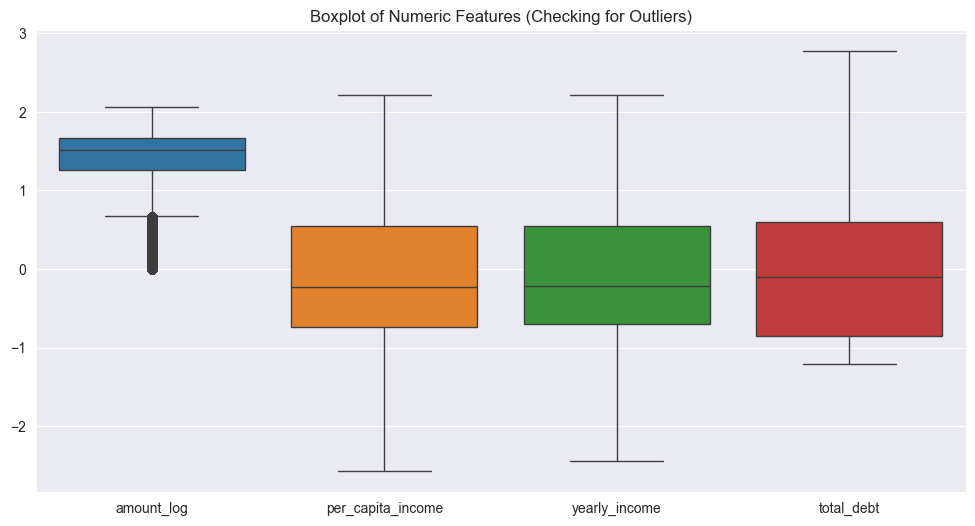

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for Outliers using Boxplot
numeric_cols = ["amount_log", "per_capita_income", "yearly_income", "total_debt"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features (Checking for Outliers)")
plt.show()

In [46]:
# Check Skewness of Log-transformed & Scaled Features
skew_values = df[numeric_cols].skew()
print("\nSkewness of Numeric Features:\n", skew_values)


Skewness of Numeric Features:
 amount_log          -1.204147
per_capita_income    0.681330
yearly_income        0.584046
total_debt           0.786534
dtype: float64


In [47]:
# Data Types
print("\nFinal Data Types Before Saving:\n", df.dtypes)


Final Data Types Before Saving:
 date                          object
amount                       float64
year                           int64
month                          int64
day                            int64
weekday_num                    int64
is_refund                      int64
mcc_freq                     float64
amount_log                   float64
per_capita_income            float64
yearly_income                float64
total_debt                   float64
mcc                            int64
merchant_category_encoded      int64
mcc_category                  object
transaction_description       object
dtype: object


In [48]:
# Check for Any Remaining Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values Before Saving:\n", missing_values[missing_values > 0])


Missing Values Before Saving:
 Series([], dtype: int64)


In [49]:
# Defining the path to save
save_path = "../data/processed_data/processed_data.csv"
# Save to CSV
df.to_csv(save_path, index=False)
print(f" Processed dataset saved successfully at: {save_path}")

 Processed dataset saved successfully at: ../data/processed_data/processed_data.csv


In [50]:
df.head()

,date,amount,year,month,day,weekday_num,is_refund,mcc_freq,amount_log,per_capita_income,yearly_income,total_debt,mcc,merchant_category_encoded,mcc_category,transaction_description
0,2014-11-17 11:03:00,2.859340,2014,11,17,0,0,0.037627,1.350496,-0.249351,-1.615427,-0.669554,4121,96,Taxicabs and Limousines,Taxi ride
1,2019-09-22 09:50:00,4.418841,2019,9,22,6,1,0.109791,1.689882,1.368556,1.408464,-0.447318,5499,64,Miscellaneous Food Stores,Purchased snacks
2,2010-05-23 18:35:00,2.706048,2010,5,23,6,0,0.018681,1.309966,-0.597519,-0.441434,0.792950,5813,32,Drinking Places (Alcoholic Beverages),Wine tasting experience
3,2012-03-19 16:52:00,2.642622,2012,3,19,0,0,0.017465,1.292704,0.931636,0.997440,-1.193142,5942,12,Book Stores,Purchased books
4,2014-03-13 22:37:00,4.289500,2014,3,13,3,0,0.119690,1.665724,0.439516,0.534586,0.162423,5411,45,"Grocery Stores, Supermarkets",Weekly grocery run


In [4]:
import pandas as pd

# Load both datasets
reduced_df = pd.read_csv("../data/processed_data/reduced_merged_data.csv")
processed_df = pd.read_csv("../data/processed_data/processed_data.csv")

# Print column names
print("Columns in reduced_merged_data.csv:")
print(reduced_df.columns.tolist())

print("\nColumns in processed_data.csv:")
print(processed_df.columns.tolist())

Columns in reduced_merged_data.csv:
['id', 'date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year', 'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq', 'merchant_city_freq', 'use_chip_Online Transaction', 'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male', 'mcc', 'merchant_category_encoded', 'mcc_category', 'transaction_description']

Columns in processed_data.csv:
['date', 'amount', 'year', 'month', 'day', 'weekday_num', 'is_refund', 'mcc_freq', 'amount_log', 'per_capita_income', 'yearly_income', 'total_debt', 'mcc', 'merchant_category_encoded', 'mcc_category', 'transaction_description']


In [8]:
import pandas as pd

# Load both datasets
reduced_df = pd.read_csv("../data/processed_data/reduced_merged_data.csv")
processed_df = pd.read_csv("../data/processed_data/processed_data.csv")

# Merge on shared keys: 'date' and 'amount_log'
merged = pd.merge(
    processed_df,
    reduced_df[['date', 'amount_log', 'client_id']],
    on=['date', 'amount_log'],
    how='left'
)

# Save the new dataset with client_id added
merged.to_csv("../data/processed_data/processed_data.csv", index=False)
print(" client_id successfully merged and saved as 'processed_data.csv'")

 client_id successfully merged and saved as 'processed_data.csv'


In [9]:
import pandas as pd

# Load the updated processed dataset
df = pd.read_csv("../data/processed_data/processed_data.csv")

# Print all column names
print(" Columns in processed_data.csv:")
print(df.columns.tolist())

 Columns in processed_data.csv:
['date', 'amount', 'year', 'month', 'day', 'weekday_num', 'is_refund', 'mcc_freq', 'amount_log', 'per_capita_income', 'yearly_income', 'total_debt', 'mcc', 'merchant_category_encoded', 'mcc_category', 'transaction_description', 'client_id_x', 'client_id_y']


In [10]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv("../data/processed_data/processed_data.csv")

# Drop one of the duplicated client_id columns
df.drop(columns=['client_id_x'], inplace=True)
df.rename(columns={'client_id_y': 'user_id'}, inplace=True)

# Save the cleaned dataset
df.to_csv("../data/processed_data/processed_data.csv", index=False)

print(" dataset saved with 'user_id' column.")

 dataset saved with 'user_id' column.


In [12]:
df.head()

,date,amount,year,month,day,weekday_num,is_refund,mcc_freq,amount_log,per_capita_income,yearly_income,total_debt,mcc,merchant_category_encoded,mcc_category,transaction_description,user_id
0,2014-11-17 11:03:00,2.859340,2014,11,17,0,0,0.037627,1.350496,-0.249351,-1.615427,-0.669554,4121,96,Taxicabs and Limousines,Taxi ride,1451
1,2019-09-22 09:50:00,4.418841,2019,9,22,6,1,0.109791,1.689882,1.368556,1.408464,-0.447318,5499,64,Miscellaneous Food Stores,Purchased snacks,1516
2,2010-05-23 18:35:00,2.706048,2010,5,23,6,0,0.018681,1.309966,-0.597519,-0.441434,0.792950,5813,32,Drinking Places (Alcoholic Beverages),Wine tasting experience,782
3,2012-03-19 16:52:00,2.642622,2012,3,19,0,0,0.017465,1.292704,0.931636,0.997440,-1.193142,5942,12,Book Stores,Purchased books,1967
4,2014-03-13 22:37:00,4.289500,2014,3,13,3,0,0.119690,1.665724,0.439516,0.534586,0.162423,5411,45,"Grocery Stores, Supermarkets",Weekly grocery run,1340


In [13]:
print(df.columns.tolist())

['date', 'amount', 'year', 'month', 'day', 'weekday_num', 'is_refund', 'mcc_freq', 'amount_log', 'per_capita_income', 'yearly_income', 'total_debt', 'mcc', 'merchant_category_encoded', 'mcc_category', 'transaction_description', 'user_id']
